In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
# Define the exact solution u = H
def exact_solution_h1(x, y, z, t):
    return -3*torch.cos(x)*torch.sin(y)*torch.sin(z)*torch.cos(t)

def initial_condition_h1(x, y, z):
    return -3*torch.cos(x)*torch.sin(y)*torch.sin(z)

In [3]:
# Define the exact solution u = H
def exact_solution_h2(x, y, z, t):
    return -2*torch.sin(x)*torch.cos(y)*torch.sin(z)*torch.cos(t)

def initial_condition_h2(x, y, z):
    return -2*torch.sin(x)*torch.cos(y)*torch.sin(z)

In [4]:
# Define the exact solution u = H
def exact_solution_h3(x, y, z, t):
    return -torch.sin(x)*torch.sin(y)*torch.cos(z)*torch.cos(t)

def initial_condition_h3(x, y, z):
    return -torch.sin(x)*torch.sin(y)*torch.cos(z)

In [5]:
# Define the exact solution p = E
def exact_solution_e1(x, y, z, t):
    return torch.cos(x)*torch.sin(y)*torch.sin(z)*torch.cos(t)

def initial_condition_e1(x, y, z):
    return torch.cos(x)*torch.sin(y)*torch.sin(z) 

In [6]:
# Define the exact solution p = E
def exact_solution_e2(x, y, z, t):
    return torch.sin(x)*torch.cos(y)*torch.sin(z)*torch.cos(t)

def initial_condition_e2(x, y, z):
    return torch.sin(x)*torch.cos(y)*torch.sin(z)

In [7]:
# Define the exact solution p = E
def exact_solution_e3(x, y, z, t):
    return torch.sin(x)*torch.sin(y)*torch.cos(z)*torch.cos(t)

def initial_condition_e3(x, y, z):
    return torch.sin(x)*torch.sin(y)*torch.cos(z)

In [8]:
n_data = 100
n_var = 4
data_inp1 = torch.zeros((n_data, n_var))
data_inp1[:, 0] = pi/2
data_inp1[:, 1] = pi*torch.rand((n_data,1)).reshape(-1,)
data_inp1[:, 2] = pi*torch.rand((n_data,1)).reshape(-1,)
data_inp1[:, 3] = torch.rand((n_data,1)).reshape(-1,)

data_inp2 = torch.zeros((n_data, n_var))
data_inp2[:, 0] = 0.5
data_inp2[:, 1] = torch.rand((n_data,1)).reshape(-1,)
data_inp2[:, 2] = torch.rand((n_data,1)).reshape(-1,)
data_inp2[:, 3] = torch.rand((n_data,1)).reshape(-1,)

data_inp3 = torch.zeros((n_data, n_var))
data_inp3[:, 0] = 0.75
data_inp3[:, 1] = torch.rand((n_data,1)).reshape(-1,)
data_inp3[:, 2] = torch.rand((n_data,1)).reshape(-1,)
data_inp3[:, 3] = torch.rand((n_data,1)).reshape(-1,)

data_inp4 = torch.zeros((n_data, n_var))
data_inp4[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp4[:, 1] = 0.25
data_inp4[:, 2] = torch.rand((n_data,1)).reshape(-1,)
data_inp4[:, 3] = torch.rand((n_data,1)).reshape(-1,)

data_inp5 = torch.zeros((n_data, n_var))
data_inp5[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp5[:, 1] = 0.5
data_inp5[:, 2] = torch.rand((n_data,1)).reshape(-1,)
data_inp5[:, 3] = torch.rand((n_data,1)).reshape(-1,)

data_inp6 = torch.zeros((n_data, n_var))
data_inp6[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp6[:, 1] = 0.75
data_inp6[:, 2] = torch.rand((n_data,1)).reshape(-1,)
data_inp6[:, 3] = torch.rand((n_data,1)).reshape(-1,)

data_inp7 = torch.zeros((n_data, n_var))
data_inp7[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp7[:, 1] = torch.rand((n_data,1)).reshape(-1,)
data_inp7[:, 2] = 0.25
data_inp7[:, 3] = torch.rand((n_data,1)).reshape(-1,)

data_inp8 = torch.zeros((n_data, n_var))
data_inp8[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp8[:, 1] = torch.rand((n_data,1)).reshape(-1,)
data_inp8[:, 2] = 0.5
data_inp8[:, 3] = torch.rand((n_data,1)).reshape(-1,)

data_inp9 = torch.zeros((n_data, n_var))
data_inp9[:, 0] = torch.rand((n_data,1)).reshape(-1,)
data_inp9[:, 1] = torch.rand((n_data,1)).reshape(-1,)
data_inp9[:, 2] = 0.75
data_inp9[:, 3] = torch.rand((n_data,1)).reshape(-1,)

In [9]:
h1_data1 = exact_solution_h1(data_inp1[:, 0], data_inp1[:, 1], data_inp1[:, 2], data_inp1[:, 3])
h1_data1 = h1_data1.reshape(-1,1)

h1_data2 = exact_solution_h1(data_inp2[:, 0], data_inp2[:, 1], data_inp2[:, 2], data_inp1[:, 3])
h1_data2 = h1_data2.reshape(-1,1)

h1_data3 = exact_solution_h1(data_inp3[:, 0], data_inp3[:, 1], data_inp3[:, 2], data_inp1[:, 3])
h1_data3 = h1_data3.reshape(-1,1)

h1_data4 = exact_solution_h1(data_inp4[:, 0], data_inp4[:, 1], data_inp4[:, 2], data_inp1[:, 3])
h1_data4 = h1_data4.reshape(-1,1)

h1_data5 = exact_solution_h1(data_inp5[:, 0], data_inp5[:, 1], data_inp5[:, 2], data_inp1[:, 3])
h1_data5 = h1_data5.reshape(-1,1)

h1_data6 = exact_solution_h1(data_inp6[:, 0], data_inp6[:, 1], data_inp6[:, 2], data_inp1[:, 3])
h1_data6 = h1_data6.reshape(-1,1)

h1_data7 = exact_solution_h1(data_inp7[:, 0], data_inp7[:, 1], data_inp7[:, 2], data_inp1[:, 3])
h1_data7 = h1_data7.reshape(-1,1)

h1_data8 = exact_solution_h1(data_inp8[:, 0], data_inp8[:, 1], data_inp8[:, 2], data_inp1[:, 3])
h1_data8 = h1_data8.reshape(-1,1)

h1_data9 = exact_solution_h1(data_inp9[:, 0], data_inp9[:, 1], data_inp9[:, 2], data_inp1[:, 3])
h1_data9 = h1_data9.reshape(-1,1)

In [10]:
h2_data1 = exact_solution_h2(data_inp1[:, 0], data_inp1[:, 1], data_inp1[:, 2], data_inp1[:, 3])
h2_data1 = h2_data1.reshape(-1,1)

h2_data2 = exact_solution_h2(data_inp2[:, 0], data_inp2[:, 1], data_inp2[:, 2], data_inp1[:, 3])
h2_data2 = h2_data2.reshape(-1,1)

h2_data3 = exact_solution_h2(data_inp3[:, 0], data_inp3[:, 1], data_inp3[:, 2], data_inp1[:, 3])
h2_data3 = h2_data3.reshape(-1,1)

h2_data4 = exact_solution_h2(data_inp4[:, 0], data_inp4[:, 1], data_inp4[:, 2], data_inp1[:, 3])
h2_data4 = h2_data4.reshape(-1,1)

h2_data5 = exact_solution_h2(data_inp5[:, 0], data_inp5[:, 1], data_inp5[:, 2], data_inp1[:, 3])
h2_data5 = h2_data5.reshape(-1,1)

h2_data6 = exact_solution_h2(data_inp6[:, 0], data_inp6[:, 1], data_inp6[:, 2], data_inp1[:, 3])
h2_data6 = h2_data6.reshape(-1,1)

h2_data7 = exact_solution_h2(data_inp7[:, 0], data_inp7[:, 1], data_inp7[:, 2], data_inp1[:, 3])
h2_data7 = h2_data7.reshape(-1,1)

h2_data8 = exact_solution_h2(data_inp8[:, 0], data_inp8[:, 1], data_inp8[:, 2], data_inp1[:, 3])
h2_data8 = h2_data8.reshape(-1,1)

h2_data9 = exact_solution_h2(data_inp9[:, 0], data_inp9[:, 1], data_inp9[:, 2], data_inp1[:, 3])
h2_data9 = h2_data9.reshape(-1,1)

In [11]:
h3_data1 = exact_solution_h3(data_inp1[:, 0], data_inp1[:, 1], data_inp1[:, 2], data_inp1[:, 3])
h3_data1 = h3_data1.reshape(-1,1)

h3_data2 = exact_solution_h3(data_inp2[:, 0], data_inp2[:, 1], data_inp2[:, 2], data_inp1[:, 3])
h3_data2 = h3_data2.reshape(-1,1)

h3_data3 = exact_solution_h3(data_inp3[:, 0], data_inp3[:, 1], data_inp3[:, 2], data_inp1[:, 3])
h3_data3 = h3_data3.reshape(-1,1)

h3_data4 = exact_solution_h3(data_inp4[:, 0], data_inp4[:, 1], data_inp4[:, 2], data_inp1[:, 3])
h3_data4 = h3_data4.reshape(-1,1)

h3_data5 = exact_solution_h3(data_inp5[:, 0], data_inp5[:, 1], data_inp5[:, 2], data_inp1[:, 3])
h3_data5 = h3_data5.reshape(-1,1)

h3_data6 = exact_solution_h3(data_inp6[:, 0], data_inp6[:, 1], data_inp6[:, 2], data_inp1[:, 3])
h3_data6 = h3_data6.reshape(-1,1)

h3_data7 = exact_solution_h3(data_inp7[:, 0], data_inp7[:, 1], data_inp7[:, 2], data_inp1[:, 3])
h3_data7 = h3_data7.reshape(-1,1)

h3_data8 = exact_solution_h3(data_inp8[:, 0], data_inp8[:, 1], data_inp8[:, 2], data_inp1[:, 3])
h3_data8 = h3_data8.reshape(-1,1)

h3_data9 = exact_solution_h3(data_inp9[:, 0], data_inp9[:, 1], data_inp9[:, 2], data_inp1[:, 3])
h3_data9 = h3_data9.reshape(-1,1)

In [12]:
# assigning number of points
initial_pts = 200 
left_boundary_pts = 200 
right_boundary_pts = 200
back_boundary_pts = 200
front_boundary_pts = 200
top_boundary_pts = 200
bottom_boundary_pts = 200
residual_pts = 1000

In [13]:
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"

x_init = pi*torch.rand((initial_pts,1)) # initial pts
y_init = pi*torch.rand((initial_pts,1))
z_init = pi*torch.rand((initial_pts,1))
t_init =  0*x_init
init =  torch.cat([x_init, y_init, z_init, t_init],1)
h1_init = initial_condition_h1(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
h2_init = initial_condition_h2(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
h3_init = initial_condition_h3(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
e1_init = initial_condition_e1(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
e2_init = initial_condition_e2(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
e3_init = initial_condition_e3(init[:,0], init[:, 1], init[:, 2]).reshape(-1, 1)
w_init = torch.cat([h1_init, h2_init, h3_init, e1_init, e2_init, e3_init],1)


xb_left = torch.zeros((left_boundary_pts, 1)) # left spatial boundary
yb_left = pi*torch.rand((left_boundary_pts, 1)) # left spatial boundary
zb_left = pi*torch.rand((left_boundary_pts, 1)) # left spatial boundary
tb_left = torch.rand((left_boundary_pts, 1)) # 
b_left = torch.cat([xb_left, yb_left, zb_left, tb_left ],1)
h1_b_l = exact_solution_h1(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)
h2_b_l = exact_solution_h2(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)
h3_b_l = exact_solution_h3(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)
e1_b_l = exact_solution_e1(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)
e2_b_l = exact_solution_e2(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)
e3_b_l = exact_solution_e3(xb_left, yb_left, zb_left, tb_left).reshape(-1, 1)



xb_right = pi*torch.ones((right_boundary_pts, 1)) # right spatial boundary
yb_right = pi*torch.rand((right_boundary_pts, 1)) # right spatial boundary
zb_right = pi*torch.rand((right_boundary_pts, 1)) # right spatial boundary
tb_right = torch.rand((right_boundary_pts, 1)) # right boundary pts
b_right = torch.cat([xb_right, yb_right, zb_right, tb_right ],1)
h1_b_r = exact_solution_h1(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)
h2_b_r = exact_solution_h2(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)
h3_b_r = exact_solution_h3(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)
e1_b_r = exact_solution_e1(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)
e2_b_r = exact_solution_e2(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)
e3_b_r = exact_solution_e3(xb_right, yb_right, zb_right, tb_right).reshape(-1, 1)



xb_front = pi*torch.rand((front_boundary_pts, 1)) # front spatial boundary
yb_front = torch.zeros((front_boundary_pts, 1)) # front spatial boundary
zb_front = pi*torch.rand((front_boundary_pts, 1)) # front spatial boundary
tb_front = torch.rand((front_boundary_pts, 1)) # 
b_front = torch.cat([xb_front, yb_front, zb_front, tb_front ],1)
h1_b_f = exact_solution_h1(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)
h2_b_f = exact_solution_h2(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)
h3_b_f = exact_solution_h3(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)
e1_b_f = exact_solution_e1(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)
e2_b_f = exact_solution_e2(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)
e3_b_f = exact_solution_e3(xb_front, yb_front, zb_front, tb_front).reshape(-1, 1)



xb_back = pi*torch.rand((back_boundary_pts, 1)) # back spatial boundary
yb_back = pi*torch.ones((back_boundary_pts, 1)) # back spatial boundary
zb_back = pi*torch.rand((back_boundary_pts, 1)) # back spatial boundary
tb_back = torch.rand((back_boundary_pts, 1)) # back boundary pts
b_back = torch.cat([xb_back, yb_back, zb_back, tb_back ],1)
h1_b_b = exact_solution_h1(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)
h2_b_b = exact_solution_h2(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)
h3_b_b = exact_solution_h3(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)
e1_b_b = exact_solution_e1(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)
e2_b_b = exact_solution_e2(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)
e3_b_b = exact_solution_e3(xb_back, yb_back, zb_back, tb_back).reshape(-1, 1)



xb_top = pi*torch.rand((top_boundary_pts, 1)) # front spatial boundary
yb_top = pi*torch.rand((top_boundary_pts, 1)) # front spatial boundary
zb_top = pi*torch.ones((top_boundary_pts, 1)) # front spatial boundary
tb_top = torch.rand((top_boundary_pts, 1)) # 
b_top = torch.cat([xb_top, yb_top, zb_top, tb_top ],1)
h1_b_t = exact_solution_h1(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)
h2_b_t = exact_solution_h2(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)
h3_b_t = exact_solution_h3(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)
e1_b_t = exact_solution_e1(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)
e2_b_t = exact_solution_e2(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)
e3_b_t = exact_solution_e3(xb_top, yb_top, zb_top, tb_top).reshape(-1, 1)


xb_bottom = pi*torch.rand((bottom_boundary_pts, 1)) # front spatial boundary
yb_bottom = pi*torch.rand((bottom_boundary_pts, 1)) # front spatial boundary
zb_bottom = torch.zeros((bottom_boundary_pts, 1)) # front spatial boundary
tb_bottom = torch.rand((bottom_boundary_pts, 1)) # 
b_bottom = torch.cat([xb_bottom, yb_bottom, zb_bottom, tb_bottom ],1)
h1_b_bot = exact_solution_h1(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)
h2_b_bot = exact_solution_h2(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)
h3_b_bot = exact_solution_h3(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)
e1_b_bot = exact_solution_e1(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)
e2_b_bot = exact_solution_e2(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)
e3_b_bot = exact_solution_e3(xb_bottom, yb_bottom, zb_bottom, tb_bottom).reshape(-1, 1)


x_interior = pi*torch.rand((residual_pts, 1))
y_interior = pi*torch.rand((residual_pts, 1))
z_interior = pi*torch.rand((residual_pts, 1))
t_interior = torch.rand((residual_pts, 1))
interior = torch.cat([x_interior, y_interior, z_interior, t_interior],1)





training_set = DataLoader(torch.utils.data.TensorDataset(init, w_init, b_left,  b_right, b_front, b_back, b_top, b_bottom), batch_size=200, shuffle=False)

In [14]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)


In [15]:
# Model definition
my_network = NeuralNet(input_dimension = init.shape[1], output_dimension = w_init.shape[1]+6, n_hidden_layers=4, neurons=20)


In [16]:
def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
#print(my_network(init))

In [17]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [18]:
def fit(model, training_set, interior, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (initial, w_initial, bd_left,  bd_right, bd_front, bd_back, bd_top, bd_bottom) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # for initial
                initial.requires_grad = True
                w_initial_pred_ = model(initial)
                h1_initial_pred_ = w_initial_pred_[:,0].reshape(-1,1)
                h2_initial_pred_ = w_initial_pred_[:,1].reshape(-1,1)
                h3_initial_pred_ = w_initial_pred_[:,2].reshape(-1,1)
                e1_initial_pred_ = w_initial_pred_[:,3].reshape(-1,1)
                e2_initial_pred_ = w_initial_pred_[:,4].reshape(-1,1)
                e3_initial_pred_ = w_initial_pred_[:,5].reshape(-1,1)
                
                
                # with derivative
                inpu = torch.ones(initial_pts, 1 )
                
                grad_h1_ini = torch.autograd.grad(h1_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                h1_initial_t = grad_h1_ini[:, 3]
                
                grad_h2_ini = torch.autograd.grad(h2_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                h2_initial_t = grad_h2_ini[:, 3]
                
                grad_h3_ini = torch.autograd.grad(h3_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                h3_initial_t = grad_h3_ini[:, 3]
                
                grad_e1_ini = torch.autograd.grad(e1_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e1_initial_t = grad_e1_ini[:, 3]
                
                grad_e2_ini = torch.autograd.grad(e2_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e2_initial_t = grad_e2_ini[:, 3]
                
                grad_e3_ini = torch.autograd.grad(e3_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e3_initial_t = grad_e3_ini[:, 3]
                
                
                # for left boundary
                w_bd_left_pred_ = model(bd_left)
                h1_bd_left_pred_ = w_bd_left_pred_[:,0].reshape(-1,1)
                h2_bd_left_pred_ = w_bd_left_pred_[:,1].reshape(-1,1)
                h3_bd_left_pred_ = w_bd_left_pred_[:,2].reshape(-1,1)
                e1_bd_left_pred_ = w_bd_left_pred_[:,3].reshape(-1,1)
                e2_bd_left_pred_ = w_bd_left_pred_[:,4].reshape(-1,1)
                e3_bd_left_pred_ = w_bd_left_pred_[:,5].reshape(-1,1)
                
                # for right boundary
                w_bd_right_pred_ = model(bd_right)
                h1_bd_right_pred_ = w_bd_right_pred_[:,0].reshape(-1,1)
                h2_bd_right_pred_ = w_bd_right_pred_[:,1].reshape(-1,1)
                h3_bd_right_pred_ = w_bd_right_pred_[:,2].reshape(-1,1)
                e1_bd_right_pred_ = w_bd_right_pred_[:,3].reshape(-1,1)
                e2_bd_right_pred_ = w_bd_right_pred_[:,4].reshape(-1,1)
                e3_bd_right_pred_ = w_bd_right_pred_[:,5].reshape(-1,1)
                
                # for front boundary
                w_bd_front_pred_ = model(bd_front)
                h1_bd_front_pred_ = w_bd_front_pred_[:,0].reshape(-1,1)
                h2_bd_front_pred_ = w_bd_front_pred_[:,1].reshape(-1,1)
                h3_bd_front_pred_ = w_bd_front_pred_[:,2].reshape(-1,1)
                e1_bd_front_pred_ = w_bd_front_pred_[:,3].reshape(-1,1)
                e2_bd_front_pred_ = w_bd_front_pred_[:,4].reshape(-1,1)
                e3_bd_front_pred_ = w_bd_front_pred_[:,5].reshape(-1,1)
                
                # for back boundary
                w_bd_back_pred_ = model(bd_back)
                h1_bd_back_pred_ = w_bd_back_pred_[:,0].reshape(-1,1)
                h2_bd_back_pred_ = w_bd_back_pred_[:,1].reshape(-1,1)
                h3_bd_back_pred_ = w_bd_back_pred_[:,2].reshape(-1,1)
                e1_bd_back_pred_ = w_bd_back_pred_[:,3].reshape(-1,1)
                e2_bd_back_pred_ = w_bd_back_pred_[:,4].reshape(-1,1)
                e3_bd_back_pred_ = w_bd_back_pred_[:,5].reshape(-1,1)
                
                # for top boundary
                w_bd_top_pred_ = model(bd_top)
                h1_bd_top_pred_ = w_bd_top_pred_[:,0].reshape(-1,1)
                h2_bd_top_pred_ = w_bd_top_pred_[:,1].reshape(-1,1)
                h3_bd_top_pred_ = w_bd_top_pred_[:,2].reshape(-1,1)
                e1_bd_top_pred_ = w_bd_top_pred_[:,3].reshape(-1,1)
                e2_bd_top_pred_ = w_bd_top_pred_[:,4].reshape(-1,1)
                e3_bd_top_pred_ = w_bd_top_pred_[:,5].reshape(-1,1)
                
                # for bottom boundary
                w_bd_bottom_pred_ = model(bd_bottom)
                h1_bd_bottom_pred_ = w_bd_bottom_pred_[:,0].reshape(-1,1)
                h2_bd_bottom_pred_ = w_bd_bottom_pred_[:,1].reshape(-1,1)
                h3_bd_bottom_pred_ = w_bd_bottom_pred_[:,2].reshape(-1,1)
                e1_bd_bottom_pred_ = w_bd_bottom_pred_[:,3].reshape(-1,1)
                e2_bd_bottom_pred_ = w_bd_bottom_pred_[:,4].reshape(-1,1)
                e3_bd_bottom_pred_ = w_bd_bottom_pred_[:,5].reshape(-1,1)
                
                # residual calculation
                interior.requires_grad = True
                w_hat = model(interior)
                h1_hat = w_hat[:,0].reshape(-1,1)
                h2_hat = w_hat[:,1].reshape(-1,1)
                h3_hat = w_hat[:,2].reshape(-1,1)
                e1_hat = w_hat[:,3].reshape(-1,1)
                e2_hat = w_hat[:,4].reshape(-1,1)
                e3_hat = w_hat[:,5].reshape(-1,1)
                alpha1 = w_hat[:, 6].reshape(-1,1)
                alpha2 = w_hat[:, 7].reshape(-1,1)
                alpha3 = w_hat[:, 8].reshape(-1,1)
                alpha4 = w_hat[:, 9].reshape(-1,1)
                alpha5 = w_hat[:, 10].reshape(-1,1)
                alpha6 = w_hat[:, 11].reshape(-1,1)
                
                inputs = torch.ones(residual_pts, 1 )
                inputs2 = torch.ones(residual_pts, 1)
                
                grad_h1_hat = torch.autograd.grad(h1_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                h1_x = grad_h1_hat[:, 0].reshape(-1,1)
                h1_y = grad_h1_hat[:, 1].reshape(-1,1)
                h1_z = grad_h1_hat[:, 2].reshape(-1,1)
                
                grad_h2_hat = torch.autograd.grad(h2_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                h2_x = grad_h2_hat[:, 0].reshape(-1,1)
                h2_y = grad_h2_hat[:, 1].reshape(-1,1)
                h2_z = grad_h2_hat[:, 2].reshape(-1,1)
                
                grad_h3_hat = torch.autograd.grad(h3_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                h3_x = grad_h3_hat[:, 0].reshape(-1,1)
                h3_y = grad_h3_hat[:, 1].reshape(-1,1)
                h3_z = grad_h3_hat[:, 2].reshape(-1,1)
                
                grad_e1_hat = torch.autograd.grad(e1_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e1_x = grad_e1_hat[:, 0].reshape(-1,1)
                e1_y = grad_e1_hat[:, 1].reshape(-1,1)
                e1_z = grad_e1_hat[:, 2].reshape(-1,1)
                
                grad_e2_hat = torch.autograd.grad(e2_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e2_x = grad_e2_hat[:, 0].reshape(-1,1)
                e2_y = grad_e2_hat[:, 1].reshape(-1,1)
                e2_z = grad_e2_hat[:, 2].reshape(-1,1)
                
                grad_e3_hat = torch.autograd.grad(e3_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e3_x = grad_e3_hat[:, 0].reshape(-1,1)
                e3_y = grad_e3_hat[:, 1].reshape(-1,1)
                e3_z = grad_e3_hat[:, 2].reshape(-1,1)
                
                h1_t = grad_h1_hat[:, 3].reshape(-1,1)
                h2_t = grad_h2_hat[:, 3].reshape(-1,1)
                h3_t = grad_h3_hat[:, 3].reshape(-1,1)
                e1_t = grad_e1_hat[:, 3].reshape(-1,1)
                e2_t = grad_e2_hat[:, 3].reshape(-1,1)
                e3_t = grad_e3_hat[:, 3].reshape(-1,1)
                
                output_data_pred1_ = model(data_inp1)
                h1_data_pred1_ = output_data_pred1_[:, 0]
                h2_data_pred1_ = output_data_pred1_[:, 1]
                h3_data_pred1_ = output_data_pred1_[:, 2]
                
                output_data_pred2_ = model(data_inp2)
                h1_data_pred2_ = output_data_pred2_[:, 0]
                h2_data_pred2_ = output_data_pred2_[:, 1]
                h3_data_pred2_ = output_data_pred2_[:, 2]
                
                output_data_pred3_ = model(data_inp3)
                h1_data_pred3_ = output_data_pred3_[:, 0]
                h2_data_pred3_ = output_data_pred3_[:, 1]
                h3_data_pred3_ = output_data_pred3_[:, 2]
                
                output_data_pred4_ = model(data_inp4)
                h1_data_pred4_ = output_data_pred4_[:, 0]
                h2_data_pred4_ = output_data_pred4_[:, 1]
                h3_data_pred4_ = output_data_pred4_[:, 2]
                
                output_data_pred5_ = model(data_inp5)
                h1_data_pred5_ = output_data_pred5_[:, 0]
                h2_data_pred5_ = output_data_pred5_[:, 1]
                h3_data_pred5_ = output_data_pred5_[:, 2]
                
                output_data_pred6_ = model(data_inp6)
                h1_data_pred6_ = output_data_pred6_[:, 0]
                h2_data_pred6_ = output_data_pred6_[:, 1]
                h3_data_pred6_ = output_data_pred6_[:, 2]
                
                output_data_pred7_ = model(data_inp7)
                h1_data_pred7_ = output_data_pred7_[:, 0]
                h2_data_pred7_ = output_data_pred7_[:, 1]
                h3_data_pred7_ = output_data_pred7_[:, 2]
                
                
                output_data_pred8_ = model(data_inp8)
                h1_data_pred8_ = output_data_pred8_[:, 0]
                h2_data_pred8_ = output_data_pred8_[:, 1]
                h3_data_pred8_ = output_data_pred8_[:, 2]
                
                output_data_pred9_ = model(data_inp9)
                h1_data_pred9_ = output_data_pred9_[:, 0]
                h2_data_pred9_ = output_data_pred9_[:, 1]
                h3_data_pred9_ = output_data_pred9_[:, 2]
                
                
                # Item 1. below
                loss1 = torch.mean((h1_initial_pred_.reshape(-1, ) - w_initial[:,0].reshape(-1, ))**p) + 0.1*torch.mean((h1_t.reshape(-1, ) + alpha1*e1_t.reshape(-1, ) + e3_y.reshape(-1, ) - e2_z.reshape(-1, ))**p)+torch.mean((h1_bd_left_pred_.reshape(-1,)- h1_b_l.reshape(-1,))**p) + torch.mean((h1_bd_right_pred_.reshape(-1,)- h1_b_r.reshape(-1,))**p) +torch.mean((h1_bd_front_pred_.reshape(-1,)- h1_b_f.reshape(-1,))**p) + torch.mean((h1_bd_back_pred_.reshape(-1,)- h1_b_b.reshape(-1,))**p) +torch.mean((h1_bd_top_pred_.reshape(-1,)- h1_b_t.reshape(-1,))**p) + torch.mean((h1_bd_bottom_pred_.reshape(-1,)- h1_b_bot.reshape(-1,))**p)
                loss2 = torch.mean((h2_initial_pred_.reshape(-1, ) - w_initial[:,1].reshape(-1, ))**p) + 0.1*torch.mean((h2_t.reshape(-1, ) + alpha2*e2_t.reshape(-1, ) + e1_z.reshape(-1, ) - e3_x.reshape(-1, ))**p)+torch.mean((h2_bd_left_pred_.reshape(-1,)- h2_b_l.reshape(-1,))**p) + torch.mean((h2_bd_right_pred_.reshape(-1,)- h2_b_r.reshape(-1,))**p) +torch.mean((h2_bd_front_pred_.reshape(-1,)- h2_b_f.reshape(-1,))**p) + torch.mean((h2_bd_back_pred_.reshape(-1,)- h2_b_b.reshape(-1,))**p) +torch.mean((h2_bd_top_pred_.reshape(-1,)- h2_b_t.reshape(-1,))**p) + torch.mean((h2_bd_bottom_pred_.reshape(-1,)- h2_b_bot.reshape(-1,))**p)
                loss3 = torch.mean((h3_initial_pred_.reshape(-1, ) - w_initial[:,2].reshape(-1, ))**p) + 0.1*torch.mean((h3_t.reshape(-1, ) + alpha3*e3_t.reshape(-1, ) + e2_x.reshape(-1, ) - e1_y.reshape(-1, ))**p)+torch.mean((h3_bd_left_pred_.reshape(-1,)- h3_b_l.reshape(-1,))**p) + torch.mean((h3_bd_right_pred_.reshape(-1,)- h3_b_r.reshape(-1,))**p) +torch.mean((h3_bd_front_pred_.reshape(-1,)- h3_b_f.reshape(-1,))**p) + torch.mean((h3_bd_back_pred_.reshape(-1,)- h3_b_b.reshape(-1,))**p) +torch.mean((h3_bd_top_pred_.reshape(-1,)- h3_b_t.reshape(-1,))**p) + torch.mean((h3_bd_bottom_pred_.reshape(-1,)- h3_b_bot.reshape(-1,))**p)
                loss4 = torch.mean((e1_initial_pred_.reshape(-1, ) - w_initial[:,3].reshape(-1, ))**p)+ 0.1*torch.mean((alpha4*e1_t.reshape(-1, ) + alpha1*h1_t.reshape(-1, )  - h3_y.reshape(-1, ) + h2_z.reshape(-1, ) + torch.sin(interior[:, 0])*torch.cos(interior[:, 1])*torch.cos(interior[:, 2])*torch.cos(interior[:, 3]))**p) +torch.mean((e1_bd_left_pred_.reshape(-1,)- e1_b_l.reshape(-1,))**p) + torch.mean((e1_bd_right_pred_.reshape(-1,)- e1_b_r.reshape(-1,))**p) +torch.mean((e1_bd_front_pred_.reshape(-1,)- e1_b_f.reshape(-1,))**p) + torch.mean((e1_bd_back_pred_.reshape(-1,)- e1_b_b.reshape(-1,))**p) +torch.mean((e1_bd_top_pred_.reshape(-1,)- e1_b_t.reshape(-1,))**p) + torch.mean((e1_bd_bottom_pred_.reshape(-1,)- e1_b_bot.reshape(-1,))**p)
                loss5 = torch.mean((e2_initial_pred_.reshape(-1, ) - w_initial[:,4].reshape(-1, ))**p)+ 0.1*torch.mean((alpha5*e2_t.reshape(-1, ) + alpha2*h2_t.reshape(-1, )  - h1_z.reshape(-1, ) + h3_x.reshape(-1, ) - 2*torch.cos(interior[:, 0])*torch.sin(interior[:, 1])*torch.cos(interior[:, 2])*torch.cos(interior[:, 3]))**p) +torch.mean((e2_bd_left_pred_.reshape(-1,)- e2_b_l.reshape(-1,))**p) + torch.mean((e2_bd_right_pred_.reshape(-1,)- e2_b_r.reshape(-1,))**p) +torch.mean((e2_bd_front_pred_.reshape(-1,)- e2_b_f.reshape(-1,))**p) + torch.mean((e2_bd_back_pred_.reshape(-1,)- e2_b_b.reshape(-1,))**p) +torch.mean((e2_bd_top_pred_.reshape(-1,)- e2_b_t.reshape(-1,))**p) + torch.mean((e2_bd_bottom_pred_.reshape(-1,)- e2_b_bot.reshape(-1,))**p)
                loss6 = torch.mean((e3_initial_pred_.reshape(-1, ) - w_initial[:,5].reshape(-1, ))**p)+ 0.1*torch.mean((alpha6*e3_t.reshape(-1, ) + alpha3*h3_t.reshape(-1, )  - h2_x.reshape(-1, ) + h1_y.reshape(-1, ) + torch.cos(interior[:, 0])*torch.cos(interior[:, 1])*torch.sin(interior[:, 2])*torch.cos(interior[:, 3]))**p) +torch.mean((e3_bd_left_pred_.reshape(-1,)- e3_b_l.reshape(-1,))**p) + torch.mean((e3_bd_right_pred_.reshape(-1,)- e3_b_r.reshape(-1,))**p) +torch.mean((e3_bd_front_pred_.reshape(-1,)- e3_b_f.reshape(-1,))**p) + torch.mean((e3_bd_back_pred_.reshape(-1,)- e3_b_b.reshape(-1,))**p) +torch.mean((e3_bd_top_pred_.reshape(-1,)- e3_b_t.reshape(-1,))**p) + torch.mean((e3_bd_bottom_pred_.reshape(-1,)- e3_b_bot.reshape(-1,))**p)
                data_h1 = torch.mean((h1_data_pred1_.reshape(-1, ) - h1_data1.reshape(-1, ))**p) #+ torch.mean((h1_data_pred2_.reshape(-1, ) - h1_data2.reshape(-1, ))**p) + torch.mean((h1_data_pred3_.reshape(-1, ) - h1_data3.reshape(-1, ))**p) + torch.mean((h1_data_pred4_.reshape(-1, ) - h1_data4.reshape(-1, ))**p) + torch.mean((h1_data_pred5_.reshape(-1, ) - h1_data5.reshape(-1, ))**p) + torch.mean((h1_data_pred6_.reshape(-1, ) - h1_data6.reshape(-1, ))**p) + torch.mean((h1_data_pred7_.reshape(-1, ) - h1_data7.reshape(-1, ))**p) + torch.mean((h1_data_pred8_.reshape(-1, ) - h1_data8.reshape(-1, ))**p) + torch.mean((h1_data_pred9_.reshape(-1, ) - h1_data9.reshape(-1, ))**p)
                data_h2 = torch.mean((h2_data_pred1_.reshape(-1, ) - h2_data1.reshape(-1, ))**p)# + torch.mean((h2_data_pred2_.reshape(-1, ) - h2_data2.reshape(-1, ))**p) + torch.mean((h2_data_pred3_.reshape(-1, ) - h2_data3.reshape(-1, ))**p) + torch.mean((h2_data_pred4_.reshape(-1, ) - h2_data4.reshape(-1, ))**p) + torch.mean((h2_data_pred5_.reshape(-1, ) - h2_data5.reshape(-1, ))**p) + torch.mean((h2_data_pred6_.reshape(-1, ) - h2_data6.reshape(-1, ))**p) + torch.mean((h2_data_pred7_.reshape(-1, ) - h2_data7.reshape(-1, ))**p) + torch.mean((h2_data_pred8_.reshape(-1, ) - h2_data8.reshape(-1, ))**p) + torch.mean((h2_data_pred9_.reshape(-1, ) - h2_data9.reshape(-1, ))**p)
                data_h3 = torch.mean((h3_data_pred1_.reshape(-1, ) - h3_data1.reshape(-1, ))**p)# + torch.mean((h3_data_pred2_.reshape(-1, ) - h3_data2.reshape(-1, ))**p) + torch.mean((h3_data_pred3_.reshape(-1, ) - h3_data3.reshape(-1, ))**p) + torch.mean((h3_data_pred4_.reshape(-1, ) - h3_data4.reshape(-1, ))**p) + torch.mean((h3_data_pred5_.reshape(-1, ) - h3_data5.reshape(-1, ))**p) + torch.mean((h3_data_pred6_.reshape(-1, ) - h3_data6.reshape(-1, ))**p) + torch.mean((h3_data_pred7_.reshape(-1, ) - h3_data7.reshape(-1, ))**p) + torch.mean((h3_data_pred8_.reshape(-1, ) - h3_data8.reshape(-1, ))**p) + torch.mean((h3_data_pred9_.reshape(-1, ) - h3_data9.reshape(-1, ))**p)
                loss = loss1 + loss2 + loss3 + loss4 + loss5 + loss6 + 0.1*(data_h1 + data_h2 + data_h3)
                
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history


In [19]:
n_epochs = 10000
history = fit(my_network, training_set, interior, n_epochs, optimizer_, p=2, verbose=True )

################################  0  ################################
Loss:  75.57545471191406
################################  1  ################################
Loss:  74.68770599365234
################################  2  ################################
Loss:  65.31661224365234
################################  3  ################################
Loss:  53.61783218383789
################################  4  ################################
Loss:  47.05715560913086
################################  5  ################################
Loss:  42.65910339355469
################################  6  ################################
Loss:  38.758358001708984
################################  7  ################################
Loss:  35.06993865966797
################################  8  ################################
Loss:  31.5622615814209
################################  9  ################################
Loss:  28.410757064819336
################################  10  ###########

Loss:  1.3296581506729126
################################  86  ################################
Loss:  1.3095455169677734
################################  87  ################################
Loss:  1.2915637493133545
################################  88  ################################
Loss:  1.2753980159759521
################################  89  ################################
Loss:  1.2592555284500122
################################  90  ################################
Loss:  1.2431297302246094
################################  91  ################################
Loss:  1.226608157157898
################################  92  ################################
Loss:  1.2117842435836792
################################  93  ################################
Loss:  1.1986559629440308
################################  94  ################################
Loss:  1.1861740350723267
################################  95  ################################
Loss:  1.173973560333252
######

Loss:  0.519702136516571
################################  170  ################################
Loss:  0.5149293541908264
################################  171  ################################
Loss:  0.5100859999656677
################################  172  ################################
Loss:  0.5050699710845947
################################  173  ################################
Loss:  0.500047504901886
################################  174  ################################
Loss:  0.49532875418663025
################################  175  ################################
Loss:  0.4906885027885437
################################  176  ################################
Loss:  0.48612040281295776
################################  177  ################################
Loss:  0.4814251959323883
################################  178  ################################
Loss:  0.4767787754535675
################################  179  ################################
Loss:  0.47244030237

Loss:  0.2881113588809967
################################  254  ################################
Loss:  0.2863701283931732
################################  255  ################################
Loss:  0.2846905589103699
################################  256  ################################
Loss:  0.28304117918014526
################################  257  ################################
Loss:  0.28141289949417114
################################  258  ################################
Loss:  0.2797766327857971
################################  259  ################################
Loss:  0.2781252861022949
################################  260  ################################
Loss:  0.27644094824790955
################################  261  ################################
Loss:  0.27472972869873047
################################  262  ################################
Loss:  0.273099809885025
################################  263  ################################
Loss:  0.27152290

Loss:  0.17362235486507416
################################  338  ################################
Loss:  0.172785222530365
################################  339  ################################
Loss:  0.17204004526138306
################################  340  ################################
Loss:  0.1713143140077591
################################  341  ################################
Loss:  0.17062713205814362
################################  342  ################################
Loss:  0.16992996633052826
################################  343  ################################
Loss:  0.16923728585243225
################################  344  ################################
Loss:  0.16854967176914215
################################  345  ################################
Loss:  0.16790081560611725
################################  346  ################################
Loss:  0.167284294962883
################################  347  ################################
Loss:  0.166684

Loss:  0.1303422898054123
################################  422  ################################
Loss:  0.12996213138103485
################################  423  ################################
Loss:  0.12958857417106628
################################  424  ################################
Loss:  0.12921467423439026
################################  425  ################################
Loss:  0.128840833902359
################################  426  ################################
Loss:  0.12846939265727997
################################  427  ################################
Loss:  0.12809832394123077
################################  428  ################################
Loss:  0.1277349293231964
################################  429  ################################
Loss:  0.1273757815361023
################################  430  ################################
Loss:  0.12702785432338715
################################  431  ################################
Loss:  0.126681

Loss:  0.1025579571723938
################################  506  ################################
Loss:  0.10224736481904984
################################  507  ################################
Loss:  0.10195065289735794
################################  508  ################################
Loss:  0.10168395936489105
################################  509  ################################
Loss:  0.10141410678625107
################################  510  ################################
Loss:  0.10115204006433487
################################  511  ################################
Loss:  0.10086573660373688
################################  512  ################################
Loss:  0.10062570869922638
################################  513  ################################
Loss:  0.10029959678649902
################################  514  ################################
Loss:  0.10005683451890945
################################  515  ################################
Loss:  0.09

Loss:  0.08216609805822372
################################  590  ################################
Loss:  0.08195138722658157
################################  591  ################################
Loss:  0.08171343803405762
################################  592  ################################
Loss:  0.08145780861377716
################################  593  ################################
Loss:  0.08122947812080383
################################  594  ################################
Loss:  0.08100004494190216
################################  595  ################################
Loss:  0.08076056092977524
################################  596  ################################
Loss:  0.08052040636539459
################################  597  ################################
Loss:  0.08027937263250351
################################  598  ################################
Loss:  0.08003883063793182
################################  599  ################################
Loss:  0.0

Loss:  0.06707160174846649
################################  674  ################################
Loss:  0.06690149009227753
################################  675  ################################
Loss:  0.0667320191860199
################################  676  ################################
Loss:  0.06656613200902939
################################  677  ################################
Loss:  0.06640128791332245
################################  678  ################################
Loss:  0.06623737514019012
################################  679  ################################
Loss:  0.06607170403003693
################################  680  ################################
Loss:  0.06590957939624786
################################  681  ################################
Loss:  0.06575271487236023
################################  682  ################################
Loss:  0.06560792773962021
################################  683  ################################
Loss:  0.06

Loss:  0.05479305610060692
################################  758  ################################
Loss:  0.054623089730739594
################################  759  ################################
Loss:  0.054450586438179016
################################  760  ################################
Loss:  0.05425063520669937
################################  761  ################################
Loss:  0.05405246466398239
################################  762  ################################
Loss:  0.05385909602046013
################################  763  ################################
Loss:  0.05366900563240051
################################  764  ################################
Loss:  0.053493060171604156
################################  765  ################################
Loss:  0.05332024395465851
################################  766  ################################
Loss:  0.05316115915775299
################################  767  ################################
Loss:  

Loss:  0.04614558815956116
################################  842  ################################
Loss:  0.04609009623527527
################################  843  ################################
Loss:  0.04603453725576401
################################  844  ################################
Loss:  0.04597712680697441
################################  845  ################################
Loss:  0.04592088237404823
################################  846  ################################
Loss:  0.04586479812860489
################################  847  ################################
Loss:  0.04581042379140854
################################  848  ################################
Loss:  0.045755013823509216
################################  849  ################################
Loss:  0.04569176584482193
################################  850  ################################
Loss:  0.045617733150720596
################################  851  ################################
Loss:  0

Loss:  0.03926689177751541
################################  926  ################################
Loss:  0.03919592499732971
################################  927  ################################
Loss:  0.03910989686846733
################################  928  ################################
Loss:  0.0390193872153759
################################  929  ################################
Loss:  0.03893347084522247
################################  930  ################################
Loss:  0.03884631022810936
################################  931  ################################
Loss:  0.03876858577132225
################################  932  ################################
Loss:  0.03868720307946205
################################  933  ################################
Loss:  0.03860504925251007
################################  934  ################################
Loss:  0.03853093832731247
################################  935  ################################
Loss:  0.03

Loss:  0.03498179465532303
################################  1010  ################################
Loss:  0.03493697941303253
################################  1011  ################################
Loss:  0.034888651221990585
################################  1012  ################################
Loss:  0.03484328091144562
################################  1013  ################################
Loss:  0.03479604795575142
################################  1014  ################################
Loss:  0.03474621847271919
################################  1015  ################################
Loss:  0.03469996899366379
################################  1016  ################################
Loss:  0.03465072810649872
################################  1017  ################################
Loss:  0.034604061394929886
################################  1018  ################################
Loss:  0.03455450013279915
################################  1019  ###############################

Loss:  0.03049726039171219
################################  1092  ################################
Loss:  0.03046383149921894
################################  1093  ################################
Loss:  0.030430924147367477
################################  1094  ################################
Loss:  0.03039798140525818
################################  1095  ################################
Loss:  0.030364301055669785
################################  1096  ################################
Loss:  0.030331050977110863
################################  1097  ################################
Loss:  0.030297117307782173
################################  1098  ################################
Loss:  0.030264006927609444
################################  1099  ################################
Loss:  0.030229460448026657
################################  1100  ################################
Loss:  0.030196629464626312
################################  1101  ##########################

Loss:  0.0271910410374403
################################  1174  ################################
Loss:  0.02716481313109398
################################  1175  ################################
Loss:  0.027139365673065186
################################  1176  ################################
Loss:  0.027112694457173347
################################  1177  ################################
Loss:  0.027086542919278145
################################  1178  ################################
Loss:  0.02705944888293743
################################  1179  ################################
Loss:  0.02703218162059784
################################  1180  ################################
Loss:  0.027003314346075058
################################  1181  ################################
Loss:  0.02697376348078251
################################  1182  ################################
Loss:  0.026942122727632523
################################  1183  #############################

Loss:  0.023824097588658333
################################  1256  ################################
Loss:  0.02379794977605343
################################  1257  ################################
Loss:  0.023771939799189568
################################  1258  ################################
Loss:  0.023739969357848167
################################  1259  ################################
Loss:  0.023707445710897446
################################  1260  ################################
Loss:  0.023671340197324753
################################  1261  ################################
Loss:  0.02363237738609314
################################  1262  ################################
Loss:  0.023585744202136993
################################  1263  ################################
Loss:  0.023540383204817772
################################  1264  ################################
Loss:  0.023490693420171738
################################  1265  #########################

Loss:  0.021379027515649796
################################  1338  ################################
Loss:  0.021353567019104958
################################  1339  ################################
Loss:  0.02132454514503479
################################  1340  ################################
Loss:  0.021303270012140274
################################  1341  ################################
Loss:  0.021278806030750275
################################  1342  ################################
Loss:  0.021257951855659485
################################  1343  ################################
Loss:  0.021238768473267555
################################  1344  ################################
Loss:  0.02121836505830288
################################  1345  ################################
Loss:  0.021197086200118065
################################  1346  ################################
Loss:  0.021173963323235512
################################  1347  #########################

Loss:  0.019731739535927773
################################  1420  ################################
Loss:  0.019718997180461884
################################  1421  ################################
Loss:  0.01970767229795456
################################  1422  ################################
Loss:  0.01969626173377037
################################  1423  ################################
Loss:  0.01968461275100708
################################  1424  ################################
Loss:  0.019672755151987076
################################  1425  ################################
Loss:  0.01965951733291149
################################  1426  ################################
Loss:  0.01964644156396389
################################  1427  ################################
Loss:  0.019632192328572273
################################  1428  ################################
Loss:  0.01961965672671795
################################  1429  #############################

Loss:  0.018087545409798622
################################  1502  ################################
Loss:  0.018076671287417412
################################  1503  ################################
Loss:  0.018066398799419403
################################  1504  ################################
Loss:  0.018054932355880737
################################  1505  ################################
Loss:  0.01804293878376484
################################  1506  ################################
Loss:  0.01802915893495083
################################  1507  ################################
Loss:  0.018016871064901352
################################  1508  ################################
Loss:  0.018002714961767197
################################  1509  ################################
Loss:  0.017986834049224854
################################  1510  ################################
Loss:  0.017969923093914986
################################  1511  #########################

Loss:  0.01699674502015114
################################  1584  ################################
Loss:  0.01698416844010353
################################  1585  ################################
Loss:  0.016970856115221977
################################  1586  ################################
Loss:  0.01695580780506134
################################  1587  ################################
Loss:  0.016943037509918213
################################  1588  ################################
Loss:  0.016930431127548218
################################  1589  ################################
Loss:  0.016917239874601364
################################  1590  ################################
Loss:  0.01690322905778885
################################  1591  ################################
Loss:  0.01688998192548752
################################  1592  ################################
Loss:  0.01687765121459961
################################  1593  #############################

Loss:  0.015915384516119957
################################  1666  ################################
Loss:  0.015907367691397667
################################  1667  ################################
Loss:  0.01589909940958023
################################  1668  ################################
Loss:  0.015890605747699738
################################  1669  ################################
Loss:  0.015881888568401337
################################  1670  ################################
Loss:  0.01587330363690853
################################  1671  ################################
Loss:  0.015864327549934387
################################  1672  ################################
Loss:  0.015855956822633743
################################  1673  ################################
Loss:  0.015847641974687576
################################  1674  ################################
Loss:  0.015839682891964912
################################  1675  #########################

Loss:  0.015135198831558228
################################  1748  ################################
Loss:  0.01512229721993208
################################  1749  ################################
Loss:  0.015111846849322319
################################  1750  ################################
Loss:  0.015100989490747452
################################  1751  ################################
Loss:  0.015091922134160995
################################  1752  ################################
Loss:  0.0150813153013587
################################  1753  ################################
Loss:  0.015069158747792244
################################  1754  ################################
Loss:  0.015056093223392963
################################  1755  ################################
Loss:  0.015044082887470722
################################  1756  ################################
Loss:  0.015031383372843266
################################  1757  ##########################

Loss:  0.014267722144722939
################################  1830  ################################
Loss:  0.014259115792810917
################################  1831  ################################
Loss:  0.014250158332288265
################################  1832  ################################
Loss:  0.014242502860724926
################################  1833  ################################
Loss:  0.014235937967896461
################################  1834  ################################
Loss:  0.01422855257987976
################################  1835  ################################
Loss:  0.014223002828657627
################################  1836  ################################
Loss:  0.014215510338544846
################################  1837  ################################
Loss:  0.014207741245627403
################################  1838  ################################
Loss:  0.014198606833815575
################################  1839  ########################

Loss:  0.013497835956513882
################################  1912  ################################
Loss:  0.013484182767570019
################################  1913  ################################
Loss:  0.013472208753228188
################################  1914  ################################
Loss:  0.013459432870149612
################################  1915  ################################
Loss:  0.01344907097518444
################################  1916  ################################
Loss:  0.013438069261610508
################################  1917  ################################
Loss:  0.013425655663013458
################################  1918  ################################
Loss:  0.013414109125733376
################################  1919  ################################
Loss:  0.013402339071035385
################################  1920  ################################
Loss:  0.013391094282269478
################################  1921  ########################

Loss:  0.012831541709601879
################################  1994  ################################
Loss:  0.012824789620935917
################################  1995  ################################
Loss:  0.012817556969821453
################################  1996  ################################
Loss:  0.012810292653739452
################################  1997  ################################
Loss:  0.012803418561816216
################################  1998  ################################
Loss:  0.012796971015632153
################################  1999  ################################
Loss:  0.012790641747415066
################################  2000  ################################
Loss:  0.012784464284777641
################################  2001  ################################
Loss:  0.012778621166944504
################################  2002  ################################
Loss:  0.012772729620337486
################################  2003  #######################

Loss:  0.01223972998559475
################################  2076  ################################
Loss:  0.012233101762831211
################################  2077  ################################
Loss:  0.01222618855535984
################################  2078  ################################
Loss:  0.0122183533385396
################################  2079  ################################
Loss:  0.012210986576974392
################################  2080  ################################
Loss:  0.01220371201634407
################################  2081  ################################
Loss:  0.012196901254355907
################################  2082  ################################
Loss:  0.012190284207463264
################################  2083  ################################
Loss:  0.012184062041342258
################################  2084  ################################
Loss:  0.01217852346599102
################################  2085  #############################

Loss:  0.011784795671701431
################################  2158  ################################
Loss:  0.01178014650940895
################################  2159  ################################
Loss:  0.011775191873311996
################################  2160  ################################
Loss:  0.011770764365792274
################################  2161  ################################
Loss:  0.011766519397497177
################################  2162  ################################
Loss:  0.011762349866330624
################################  2163  ################################
Loss:  0.01175821851938963
################################  2164  ################################
Loss:  0.011753953993320465
################################  2165  ################################
Loss:  0.011749488301575184
################################  2166  ################################
Loss:  0.011744889430701733
################################  2167  #########################

Loss:  0.011348603293299675
################################  2240  ################################
Loss:  0.0113447280600667
################################  2241  ################################
Loss:  0.011340662837028503
################################  2242  ################################
Loss:  0.011335811577737331
################################  2243  ################################
Loss:  0.011329897679388523
################################  2244  ################################
Loss:  0.011324266903102398
################################  2245  ################################
Loss:  0.011318452656269073
################################  2246  ################################
Loss:  0.011313077993690968
################################  2247  ################################
Loss:  0.011307528242468834
################################  2248  ################################
Loss:  0.011301281861960888
################################  2249  #########################

Loss:  0.010837836191058159
################################  2322  ################################
Loss:  0.010830826126039028
################################  2323  ################################
Loss:  0.010824501514434814
################################  2324  ################################
Loss:  0.010818754322826862
################################  2325  ################################
Loss:  0.010812276974320412
################################  2326  ################################
Loss:  0.010805126279592514
################################  2327  ################################
Loss:  0.010796643793582916
################################  2328  ################################
Loss:  0.010789060033857822
################################  2329  ################################
Loss:  0.010780018754303455
################################  2330  ################################
Loss:  0.010771192610263824
################################  2331  #######################

Loss:  0.010231058113276958
################################  2404  ################################
Loss:  0.010224863886833191
################################  2405  ################################
Loss:  0.010218792594969273
################################  2406  ################################
Loss:  0.010212687775492668
################################  2407  ################################
Loss:  0.010206795297563076
################################  2408  ################################
Loss:  0.010200757533311844
################################  2409  ################################
Loss:  0.010195198468863964
################################  2410  ################################
Loss:  0.010189871303737164
################################  2411  ################################
Loss:  0.010184114798903465
################################  2412  ################################
Loss:  0.01017933338880539
################################  2413  ########################

Loss:  0.009801269508898258
################################  2486  ################################
Loss:  0.009796734899282455
################################  2487  ################################
Loss:  0.009791682474315166
################################  2488  ################################
Loss:  0.009787194430828094
################################  2489  ################################
Loss:  0.009780868887901306
################################  2490  ################################
Loss:  0.009776320308446884
################################  2491  ################################
Loss:  0.009770641103386879
################################  2492  ################################
Loss:  0.00976487621665001
################################  2493  ################################
Loss:  0.009758717380464077
################################  2494  ################################
Loss:  0.00975163746625185
################################  2495  #########################

Loss:  0.009323200210928917
################################  2568  ################################
Loss:  0.00932002067565918
################################  2569  ################################
Loss:  0.009316887706518173
################################  2570  ################################
Loss:  0.009313496761023998
################################  2571  ################################
Loss:  0.00931016355752945
################################  2572  ################################
Loss:  0.00930666271597147
################################  2573  ################################
Loss:  0.00930298212915659
################################  2574  ################################
Loss:  0.009299413301050663
################################  2575  ################################
Loss:  0.009295601397752762
################################  2576  ################################
Loss:  0.009292073547840118
################################  2577  ###########################

Loss:  0.00889758113771677
################################  2650  ################################
Loss:  0.00889402162283659
################################  2651  ################################
Loss:  0.008889266289770603
################################  2652  ################################
Loss:  0.008885396644473076
################################  2653  ################################
Loss:  0.008880236186087132
################################  2654  ################################
Loss:  0.008874456398189068
################################  2655  ################################
Loss:  0.008867326192557812
################################  2656  ################################
Loss:  0.008860847912728786
################################  2657  ################################
Loss:  0.008852650411427021
################################  2658  ################################
Loss:  0.008845802396535873
################################  2659  #########################

Loss:  0.008555542677640915
################################  2732  ################################
Loss:  0.00855247862637043
################################  2733  ################################
Loss:  0.008549431338906288
################################  2734  ################################
Loss:  0.008546349592506886
################################  2735  ################################
Loss:  0.008543211966753006
################################  2736  ################################
Loss:  0.008540226146578789
################################  2737  ################################
Loss:  0.00853732880204916
################################  2738  ################################
Loss:  0.008534381166100502
################################  2739  ################################
Loss:  0.008531362749636173
################################  2740  ################################
Loss:  0.008528738282620907
################################  2741  #########################

Loss:  0.008248046040534973
################################  2814  ################################
Loss:  0.008244705386459827
################################  2815  ################################
Loss:  0.008241448551416397
################################  2816  ################################
Loss:  0.008238401263952255
################################  2817  ################################
Loss:  0.0082356883212924
################################  2818  ################################
Loss:  0.008233158849179745
################################  2819  ################################
Loss:  0.00823093019425869
################################  2820  ################################
Loss:  0.008228837512433529
################################  2821  ################################
Loss:  0.008227082900702953
################################  2822  ################################
Loss:  0.008225301280617714
################################  2823  ##########################

Loss:  0.007976176217198372
################################  2896  ################################
Loss:  0.00797278992831707
################################  2897  ################################
Loss:  0.007969350554049015
################################  2898  ################################
Loss:  0.00796586461365223
################################  2899  ################################
Loss:  0.007962382398545742
################################  2900  ################################
Loss:  0.007959181442856789
################################  2901  ################################
Loss:  0.007956037297844887
################################  2902  ################################
Loss:  0.007953032851219177
################################  2903  ################################
Loss:  0.007950139231979847
################################  2904  ################################
Loss:  0.007947387173771858
################################  2905  #########################

Loss:  0.00775282084941864
################################  2978  ################################
Loss:  0.007750356569886208
################################  2979  ################################
Loss:  0.00774766318500042
################################  2980  ################################
Loss:  0.0077451602555811405
################################  2981  ################################
Loss:  0.007742598187178373
################################  2982  ################################
Loss:  0.007739586755633354
################################  2983  ################################
Loss:  0.007736865896731615
################################  2984  ################################
Loss:  0.007733941078186035
################################  2985  ################################
Loss:  0.007731032557785511
################################  2986  ################################
Loss:  0.007727948483079672
################################  2987  ########################

Loss:  0.0075160483829677105
################################  3060  ################################
Loss:  0.007512080017477274
################################  3061  ################################
Loss:  0.007507077418267727
################################  3062  ################################
Loss:  0.007501540705561638
################################  3063  ################################
Loss:  0.007495887577533722
################################  3064  ################################
Loss:  0.007489828858524561
################################  3065  ################################
Loss:  0.007484450004994869
################################  3066  ################################
Loss:  0.007479126565158367
################################  3067  ################################
Loss:  0.007473595906049013
################################  3068  ################################
Loss:  0.007468474097549915
################################  3069  ######################

Loss:  0.007218373939394951
################################  3142  ################################
Loss:  0.007214024197310209
################################  3143  ################################
Loss:  0.007210074458271265
################################  3144  ################################
Loss:  0.00720644136890769
################################  3145  ################################
Loss:  0.007203250657767057
################################  3146  ################################
Loss:  0.00720034446567297
################################  3147  ################################
Loss:  0.007197675295174122
################################  3148  ################################
Loss:  0.007195259444415569
################################  3149  ################################
Loss:  0.007193027064204216
################################  3150  ################################
Loss:  0.007190795615315437
################################  3151  #########################

Loss:  0.006940470542758703
################################  3224  ################################
Loss:  0.006936806719750166
################################  3225  ################################
Loss:  0.006933430675417185
################################  3226  ################################
Loss:  0.006930266972631216
################################  3227  ################################
Loss:  0.0069272927939891815
################################  3228  ################################
Loss:  0.0069244676269590855
################################  3229  ################################
Loss:  0.006921648979187012
################################  3230  ################################
Loss:  0.0069189914502203465
################################  3231  ################################
Loss:  0.00691658491268754
################################  3232  ################################
Loss:  0.006914061959832907
################################  3233  #####################

Loss:  0.006668418180197477
################################  3306  ################################
Loss:  0.006664257030934095
################################  3307  ################################
Loss:  0.0066603790037333965
################################  3308  ################################
Loss:  0.006656767800450325
################################  3309  ################################
Loss:  0.006653010379523039
################################  3310  ################################
Loss:  0.00664973771199584
################################  3311  ################################
Loss:  0.006646407302469015
################################  3312  ################################
Loss:  0.0066427611745893955
################################  3313  ################################
Loss:  0.006639761850237846
################################  3314  ################################
Loss:  0.006637187674641609
################################  3315  ######################

Loss:  0.006477035116404295
################################  3388  ################################
Loss:  0.006474755704402924
################################  3389  ################################
Loss:  0.00647246977314353
################################  3390  ################################
Loss:  0.00647020572796464
################################  3391  ################################
Loss:  0.006468040868639946
################################  3392  ################################
Loss:  0.0064656734466552734
################################  3393  ################################
Loss:  0.006463713478296995
################################  3394  ################################
Loss:  0.0064616515301167965
################################  3395  ################################
Loss:  0.00645992998033762
################################  3396  ################################
Loss:  0.006457860581576824
################################  3397  ########################

Loss:  0.006291315425187349
################################  3470  ################################
Loss:  0.006288392003625631
################################  3471  ################################
Loss:  0.006285164039582014
################################  3472  ################################
Loss:  0.006282350048422813
################################  3473  ################################
Loss:  0.006279465276747942
################################  3474  ################################
Loss:  0.006277272943407297
################################  3475  ################################
Loss:  0.006274743005633354
################################  3476  ################################
Loss:  0.006271736696362495
################################  3477  ################################
Loss:  0.0062688072212040424
################################  3478  ################################
Loss:  0.006265985779464245
################################  3479  ######################

Loss:  0.006074503995478153
################################  3552  ################################
Loss:  0.0060720862820744514
################################  3553  ################################
Loss:  0.006069551687687635
################################  3554  ################################
Loss:  0.006066957954317331
################################  3555  ################################
Loss:  0.0060640922747552395
################################  3556  ################################
Loss:  0.006061573978513479
################################  3557  ################################
Loss:  0.00605909526348114
################################  3558  ################################
Loss:  0.0060564628802239895
################################  3559  ################################
Loss:  0.006053779739886522
################################  3560  ################################
Loss:  0.006051002070307732
################################  3561  #####################

Loss:  0.005834650248289108
################################  3634  ################################
Loss:  0.0058323391713202
################################  3635  ################################
Loss:  0.005829997826367617
################################  3636  ################################
Loss:  0.005828008055686951
################################  3637  ################################
Loss:  0.005826062057167292
################################  3638  ################################
Loss:  0.005823970306664705
################################  3639  ################################
Loss:  0.0058222124353051186
################################  3640  ################################
Loss:  0.005820422433316708
################################  3641  ################################
Loss:  0.005818638950586319
################################  3642  ################################
Loss:  0.0058171567507088184
################################  3643  #######################

Loss:  0.005592011380940676
################################  3716  ################################
Loss:  0.005590513348579407
################################  3717  ################################
Loss:  0.005589115433394909
################################  3718  ################################
Loss:  0.005587575025856495
################################  3719  ################################
Loss:  0.0055861566215753555
################################  3720  ################################
Loss:  0.00558448163792491
################################  3721  ################################
Loss:  0.005583020392805338
################################  3722  ################################
Loss:  0.005581534467637539
################################  3723  ################################
Loss:  0.005580103490501642
################################  3724  ################################
Loss:  0.005578602198511362
################################  3725  #######################

Loss:  0.005426171235740185
################################  3798  ################################
Loss:  0.005424307659268379
################################  3799  ################################
Loss:  0.005422137677669525
################################  3800  ################################
Loss:  0.005420417990535498
################################  3801  ################################
Loss:  0.005418494809418917
################################  3802  ################################
Loss:  0.005416582804173231
################################  3803  ################################
Loss:  0.005414559971541166
################################  3804  ################################
Loss:  0.005412222817540169
################################  3805  ################################
Loss:  0.005409657023847103
################################  3806  ################################
Loss:  0.005406839773058891
################################  3807  #######################

Loss:  0.00527165737003088
################################  3880  ################################
Loss:  0.0052693379111588
################################  3881  ################################
Loss:  0.0052668871358036995
################################  3882  ################################
Loss:  0.005264729727059603
################################  3883  ################################
Loss:  0.005262875463813543
################################  3884  ################################
Loss:  0.005261212587356567
################################  3885  ################################
Loss:  0.005259544122964144
################################  3886  ################################
Loss:  0.005257894285023212
################################  3887  ################################
Loss:  0.005256189964711666
################################  3888  ################################
Loss:  0.005254449788480997
################################  3889  #########################

Loss:  0.005094355903565884
################################  3962  ################################
Loss:  0.005091471131891012
################################  3963  ################################
Loss:  0.005088179372251034
################################  3964  ################################
Loss:  0.005084539297968149
################################  3965  ################################
Loss:  0.005081553012132645
################################  3966  ################################
Loss:  0.0050785052590072155
################################  3967  ################################
Loss:  0.005075060296803713
################################  3968  ################################
Loss:  0.005071933846920729
################################  3969  ################################
Loss:  0.005068604834377766
################################  3970  ################################
Loss:  0.005065892357379198
################################  3971  ######################

Loss:  0.0049639539793133736
################################  4044  ################################
Loss:  0.004962038714438677
################################  4045  ################################
Loss:  0.004959838930517435
################################  4046  ################################
Loss:  0.0049575455486774445
################################  4047  ################################
Loss:  0.004955402109771967
################################  4048  ################################
Loss:  0.004953259602189064
################################  4049  ################################
Loss:  0.004950885660946369
################################  4050  ################################
Loss:  0.004948877263814211
################################  4051  ################################
Loss:  0.0049468898214399815
################################  4052  ################################
Loss:  0.004945063963532448
################################  4053  ####################

Loss:  0.004754969384521246
################################  4126  ################################
Loss:  0.0047525144182145596
################################  4127  ################################
Loss:  0.004750202875584364
################################  4128  ################################
Loss:  0.004747945815324783
################################  4129  ################################
Loss:  0.0047457292675971985
################################  4130  ################################
Loss:  0.004743628203868866
################################  4131  ################################
Loss:  0.004741290584206581
################################  4132  ################################
Loss:  0.004739061929285526
################################  4133  ################################
Loss:  0.0047368137165904045
################################  4134  ################################
Loss:  0.00473432894796133
################################  4135  #####################

Loss:  0.004599564243108034
################################  4208  ################################
Loss:  0.004598157946020365
################################  4209  ################################
Loss:  0.004596530459821224
################################  4210  ################################
Loss:  0.004594434518367052
################################  4211  ################################
Loss:  0.004592845216393471
################################  4212  ################################
Loss:  0.004591211210936308
################################  4213  ################################
Loss:  0.0045891813933849335
################################  4214  ################################
Loss:  0.004587612114846706
################################  4215  ################################
Loss:  0.004586074035614729
################################  4216  ################################
Loss:  0.004584199748933315
################################  4217  ######################

Loss:  0.004477610811591148
################################  4290  ################################
Loss:  0.004475744906812906
################################  4291  ################################
Loss:  0.0044736252166330814
################################  4292  ################################
Loss:  0.00447132857516408
################################  4293  ################################
Loss:  0.00446887593716383
################################  4294  ################################
Loss:  0.004466198850423098
################################  4295  ################################
Loss:  0.004464011173695326
################################  4296  ################################
Loss:  0.004461882170289755
################################  4297  ################################
Loss:  0.004459736868739128
################################  4298  ################################
Loss:  0.0044572982005774975
################################  4299  #######################

Loss:  0.004319120664149523
################################  4372  ################################
Loss:  0.004317649640142918
################################  4373  ################################
Loss:  0.004316120874136686
################################  4374  ################################
Loss:  0.0043146307580173016
################################  4375  ################################
Loss:  0.004313088022172451
################################  4376  ################################
Loss:  0.00431159557774663
################################  4377  ################################
Loss:  0.004310020711272955
################################  4378  ################################
Loss:  0.00430846493691206
################################  4379  ################################
Loss:  0.004306797869503498
################################  4380  ################################
Loss:  0.004304730333387852
################################  4381  ########################

Loss:  0.0042029693722724915
################################  4454  ################################
Loss:  0.004200839437544346
################################  4455  ################################
Loss:  0.004198532085865736
################################  4456  ################################
Loss:  0.004196756053715944
################################  4457  ################################
Loss:  0.004194959066808224
################################  4458  ################################
Loss:  0.004193069413304329
################################  4459  ################################
Loss:  0.004191068932414055
################################  4460  ################################
Loss:  0.004188993014395237
################################  4461  ################################
Loss:  0.004187428392469883
################################  4462  ################################
Loss:  0.004185877274721861
################################  4463  ######################

Loss:  0.004073513671755791
################################  4536  ################################
Loss:  0.004070820286870003
################################  4537  ################################
Loss:  0.004068863112479448
################################  4538  ################################
Loss:  0.004066494759172201
################################  4539  ################################
Loss:  0.004063899163156748
################################  4540  ################################
Loss:  0.004061258397996426
################################  4541  ################################
Loss:  0.004058367107063532
################################  4542  ################################
Loss:  0.00405572634190321
################################  4543  ################################
Loss:  0.004053015261888504
################################  4544  ################################
Loss:  0.004050905350595713
################################  4545  ########################

Loss:  0.00392420869320631
################################  4618  ################################
Loss:  0.003922480158507824
################################  4619  ################################
Loss:  0.003920676652342081
################################  4620  ################################
Loss:  0.003918920177966356
################################  4621  ################################
Loss:  0.003917268943041563
################################  4622  ################################
Loss:  0.0039156354032456875
################################  4623  ################################
Loss:  0.003913982305675745
################################  4624  ################################
Loss:  0.003912585787475109
################################  4625  ################################
Loss:  0.0039112805388867855
################################  4626  ################################
Loss:  0.003909648396074772
################################  4627  ######################

Loss:  0.003777353325858712
################################  4700  ################################
Loss:  0.0037749207112938166
################################  4701  ################################
Loss:  0.003772065509110689
################################  4702  ################################
Loss:  0.0037694983184337616
################################  4703  ################################
Loss:  0.003766329027712345
################################  4704  ################################
Loss:  0.0037642954848706722
################################  4705  ################################
Loss:  0.0037621702067553997
################################  4706  ################################
Loss:  0.003759898943826556
################################  4707  ################################
Loss:  0.0037576546892523766
################################  4708  ################################
Loss:  0.003755517303943634
################################  4709  ##################

Loss:  0.0036373273469507694
################################  4782  ################################
Loss:  0.0036360928788781166
################################  4783  ################################
Loss:  0.003634832566604018
################################  4784  ################################
Loss:  0.0036336304619908333
################################  4785  ################################
Loss:  0.0036324115935713053
################################  4786  ################################
Loss:  0.003631308674812317
################################  4787  ################################
Loss:  0.003630279563367367
################################  4788  ################################
Loss:  0.003629163606092334
################################  4789  ################################
Loss:  0.003628148464486003
################################  4790  ################################
Loss:  0.0036270469427108765
################################  4791  ##################

Loss:  0.0035216326359659433
################################  4864  ################################
Loss:  0.003519752761349082
################################  4865  ################################
Loss:  0.0035180363338440657
################################  4866  ################################
Loss:  0.0035163264255970716
################################  4867  ################################
Loss:  0.003514884738251567
################################  4868  ################################
Loss:  0.003513323375955224
################################  4869  ################################
Loss:  0.0035115594509989023
################################  4870  ################################
Loss:  0.0035098139196634293
################################  4871  ################################
Loss:  0.003508154535666108
################################  4872  ################################
Loss:  0.0035065708216279745
################################  4873  #################

Loss:  0.003411505836993456
################################  4946  ################################
Loss:  0.0034102783538401127
################################  4947  ################################
Loss:  0.003409033175557852
################################  4948  ################################
Loss:  0.003407513489946723
################################  4949  ################################
Loss:  0.003406466916203499
################################  4950  ################################
Loss:  0.0034054298885166645
################################  4951  ################################
Loss:  0.0034043018240481615
################################  4952  ################################
Loss:  0.0034031232353299856
################################  4953  ################################
Loss:  0.003401994239538908
################################  4954  ################################
Loss:  0.003401027759537101
################################  4955  ###################

Loss:  0.003305034013465047
################################  5028  ################################
Loss:  0.003303660312667489
################################  5029  ################################
Loss:  0.0033026421442627907
################################  5030  ################################
Loss:  0.003301369259133935
################################  5031  ################################
Loss:  0.003299940610304475
################################  5032  ################################
Loss:  0.0032984204590320587
################################  5033  ################################
Loss:  0.0032970341853797436
################################  5034  ################################
Loss:  0.0032955962233245373
################################  5035  ################################
Loss:  0.003294041845947504
################################  5036  ################################
Loss:  0.003292352193966508
################################  5037  ###################

Loss:  0.0031964844092726707
################################  5110  ################################
Loss:  0.003195605706423521
################################  5111  ################################
Loss:  0.0031944832298904657
################################  5112  ################################
Loss:  0.00319363409653306
################################  5113  ################################
Loss:  0.0031931016128510237
################################  5114  ################################
Loss:  0.0031922634225338697
################################  5115  ################################
Loss:  0.0031913770362734795
################################  5116  ################################
Loss:  0.003190430346876383
################################  5117  ################################
Loss:  0.003189424052834511
################################  5118  ################################
Loss:  0.0031883809715509415
################################  5119  ##################

Loss:  0.0031111014541238546
################################  5192  ################################
Loss:  0.0031099356710910797
################################  5193  ################################
Loss:  0.003108699806034565
################################  5194  ################################
Loss:  0.003107329597696662
################################  5195  ################################
Loss:  0.003105851588770747
################################  5196  ################################
Loss:  0.0031047058291733265
################################  5197  ################################
Loss:  0.003103272756561637
################################  5198  ################################
Loss:  0.003101975889876485
################################  5199  ################################
Loss:  0.0031004694756120443
################################  5200  ################################
Loss:  0.0030990184750407934
################################  5201  ##################

Loss:  0.0030104389879852533
################################  5274  ################################
Loss:  0.0030090685468167067
################################  5275  ################################
Loss:  0.0030076769180595875
################################  5276  ################################
Loss:  0.0030064652673900127
################################  5277  ################################
Loss:  0.0030051409266889095
################################  5278  ################################
Loss:  0.003003668738529086
################################  5279  ################################
Loss:  0.0030021280981600285
################################  5280  ################################
Loss:  0.00300038093701005
################################  5281  ################################
Loss:  0.00299910269677639
################################  5282  ################################
Loss:  0.0029978863894939423
################################  5283  ##################

Loss:  0.0029173900838941336
################################  5356  ################################
Loss:  0.0029162985738366842
################################  5357  ################################
Loss:  0.00291526410728693
################################  5358  ################################
Loss:  0.002914067590609193
################################  5359  ################################
Loss:  0.0029129390604794025
################################  5360  ################################
Loss:  0.0029117041267454624
################################  5361  ################################
Loss:  0.00291063217446208
################################  5362  ################################
Loss:  0.0029095616191625595
################################  5363  ################################
Loss:  0.0029086468275636435
################################  5364  ################################
Loss:  0.0029077082872390747
################################  5365  ##################

Loss:  0.002849479438737035
################################  5438  ################################
Loss:  0.002848808653652668
################################  5439  ################################
Loss:  0.0028481073677539825
################################  5440  ################################
Loss:  0.0028473164420574903
################################  5441  ################################
Loss:  0.0028464084025472403
################################  5442  ################################
Loss:  0.0028453643899410963
################################  5443  ################################
Loss:  0.002844438189640641
################################  5444  ################################
Loss:  0.002843427238985896
################################  5445  ################################
Loss:  0.0028424144256860018
################################  5446  ################################
Loss:  0.002841382985934615
################################  5447  ##################

Loss:  0.0027874091174453497
################################  5520  ################################
Loss:  0.002786535769701004
################################  5521  ################################
Loss:  0.0027855306398123503
################################  5522  ################################
Loss:  0.002784262178465724
################################  5523  ################################
Loss:  0.002783354604616761
################################  5524  ################################
Loss:  0.0027823983691632748
################################  5525  ################################
Loss:  0.0027813741471618414
################################  5526  ################################
Loss:  0.0027801936957985163
################################  5527  ################################
Loss:  0.0027793238405138254
################################  5528  ################################
Loss:  0.002778522204607725
################################  5529  #################

Loss:  0.0027222302742302418
################################  5602  ################################
Loss:  0.0027213129214942455
################################  5603  ################################
Loss:  0.0027203785721212626
################################  5604  ################################
Loss:  0.0027194067370146513
################################  5605  ################################
Loss:  0.00271846866235137
################################  5606  ################################
Loss:  0.002717593451961875
################################  5607  ################################
Loss:  0.002716765273362398
################################  5608  ################################
Loss:  0.002715867944061756
################################  5609  ################################
Loss:  0.0027150537353008986
################################  5610  ################################
Loss:  0.0027142451144754887
################################  5611  ##################

Loss:  0.0026714764535427094
################################  5684  ################################
Loss:  0.002671021269634366
################################  5685  ################################
Loss:  0.0026705563068389893
################################  5686  ################################
Loss:  0.0026700713206082582
################################  5687  ################################
Loss:  0.0026695916894823313
################################  5688  ################################
Loss:  0.002669085282832384
################################  5689  ################################
Loss:  0.002668591681867838
################################  5690  ################################
Loss:  0.0026680966839194298
################################  5691  ################################
Loss:  0.002667539520189166
################################  5692  ################################
Loss:  0.002667035209015012
################################  5693  ##################

Loss:  0.0026269492227584124
################################  5766  ################################
Loss:  0.0026264754123985767
################################  5767  ################################
Loss:  0.002626031171530485
################################  5768  ################################
Loss:  0.0026255277916789055
################################  5769  ################################
Loss:  0.0026251310482621193
################################  5770  ################################
Loss:  0.0026246188208460808
################################  5771  ################################
Loss:  0.0026240083388984203
################################  5772  ################################
Loss:  0.0026232199743390083
################################  5773  ################################
Loss:  0.002622602041810751
################################  5774  ################################
Loss:  0.0026217594277113676
################################  5775  ###############

Loss:  0.002550784731283784
################################  5848  ################################
Loss:  0.0025499495677649975
################################  5849  ################################
Loss:  0.0025491458363831043
################################  5850  ################################
Loss:  0.0025483800563961267
################################  5851  ################################
Loss:  0.002547645242884755
################################  5852  ################################
Loss:  0.002546996343880892
################################  5853  ################################
Loss:  0.0025463406927883625
################################  5854  ################################
Loss:  0.0025457246229052544
################################  5855  ################################
Loss:  0.0025451802648603916
################################  5856  ################################
Loss:  0.002544643357396126
################################  5857  #################

Loss:  0.002490571467205882
################################  5930  ################################
Loss:  0.002489842940121889
################################  5931  ################################
Loss:  0.0024890003260225058
################################  5932  ################################
Loss:  0.002488073194399476
################################  5933  ################################
Loss:  0.0024872266221791506
################################  5934  ################################
Loss:  0.0024862345308065414
################################  5935  ################################
Loss:  0.0024851965717971325
################################  5936  ################################
Loss:  0.0024840328842401505
################################  5937  ################################
Loss:  0.0024830803740769625
################################  5938  ################################
Loss:  0.0024820007383823395
################################  5939  ################

Loss:  0.0024341277312487364
################################  6012  ################################
Loss:  0.002433288376778364
################################  6013  ################################
Loss:  0.002432393841445446
################################  6014  ################################
Loss:  0.002431635046377778
################################  6015  ################################
Loss:  0.0024306601844727993
################################  6016  ################################
Loss:  0.0024298918433487415
################################  6017  ################################
Loss:  0.002429130719974637
################################  6018  ################################
Loss:  0.0024282322265207767
################################  6019  ################################
Loss:  0.002427493454888463
################################  6020  ################################
Loss:  0.0024264641106128693
################################  6021  ##################

Loss:  0.0023664264008402824
################################  6094  ################################
Loss:  0.002365819411352277
################################  6095  ################################
Loss:  0.0023650932125747204
################################  6096  ################################
Loss:  0.0023641735315322876
################################  6097  ################################
Loss:  0.002363462233915925
################################  6098  ################################
Loss:  0.002362581202760339
################################  6099  ################################
Loss:  0.00236165220849216
################################  6100  ################################
Loss:  0.0023605497553944588
################################  6101  ################################
Loss:  0.0023593620862811804
################################  6102  ################################
Loss:  0.002358113881200552
################################  6103  ###################

Loss:  0.002296881750226021
################################  6176  ################################
Loss:  0.002295970218256116
################################  6177  ################################
Loss:  0.002295138780027628
################################  6178  ################################
Loss:  0.002294328762218356
################################  6179  ################################
Loss:  0.002293613739311695
################################  6180  ################################
Loss:  0.002292951801791787
################################  6181  ################################
Loss:  0.002292332937940955
################################  6182  ################################
Loss:  0.0022917822934687138
################################  6183  ################################
Loss:  0.0022911482956260443
################################  6184  ################################
Loss:  0.0022906330414116383
################################  6185  ####################

Loss:  0.0022366356570273638
################################  6258  ################################
Loss:  0.002236048225313425
################################  6259  ################################
Loss:  0.0022354184184223413
################################  6260  ################################
Loss:  0.0022346931509673595
################################  6261  ################################
Loss:  0.0022339860443025827
################################  6262  ################################
Loss:  0.0022333781234920025
################################  6263  ################################
Loss:  0.0022327706683427095
################################  6264  ################################
Loss:  0.002232115250080824
################################  6265  ################################
Loss:  0.0022314421366900206
################################  6266  ################################
Loss:  0.002230794867500663
################################  6267  ################

Loss:  0.0021928222849965096
################################  6340  ################################
Loss:  0.0021923279855400324
################################  6341  ################################
Loss:  0.0021918010897934437
################################  6342  ################################
Loss:  0.0021913007367402315
################################  6343  ################################
Loss:  0.0021907587070018053
################################  6344  ################################
Loss:  0.002190270461142063
################################  6345  ################################
Loss:  0.002189714927226305
################################  6346  ################################
Loss:  0.002189223887398839
################################  6347  ################################
Loss:  0.002188705839216709
################################  6348  ################################
Loss:  0.0021880355197936296
################################  6349  #################

Loss:  0.0021368316374719143
################################  6422  ################################
Loss:  0.0021357927471399307
################################  6423  ################################
Loss:  0.00213494966737926
################################  6424  ################################
Loss:  0.0021340535022318363
################################  6425  ################################
Loss:  0.0021331002935767174
################################  6426  ################################
Loss:  0.0021320334635674953
################################  6427  ################################
Loss:  0.002131083747372031
################################  6428  ################################
Loss:  0.002130297012627125
################################  6429  ################################
Loss:  0.0021295344922691584
################################  6430  ################################
Loss:  0.0021288746502250433
################################  6431  #################

Loss:  0.0020808870904147625
################################  6504  ################################
Loss:  0.002080201171338558
################################  6505  ################################
Loss:  0.002079589292407036
################################  6506  ################################
Loss:  0.00207888032309711
################################  6507  ################################
Loss:  0.0020782107021659613
################################  6508  ################################
Loss:  0.002077509183436632
################################  6509  ################################
Loss:  0.002076663076877594
################################  6510  ################################
Loss:  0.002076022094115615
################################  6511  ################################
Loss:  0.0020753350108861923
################################  6512  ################################
Loss:  0.002074652584269643
################################  6513  #####################

Loss:  0.0020361649803817272
################################  6586  ################################
Loss:  0.002035709097981453
################################  6587  ################################
Loss:  0.0020352776627987623
################################  6588  ################################
Loss:  0.002034855308011174
################################  6589  ################################
Loss:  0.0020344394724816084
################################  6590  ################################
Loss:  0.0020340399350970984
################################  6591  ################################
Loss:  0.0020336408633738756
################################  6592  ################################
Loss:  0.002033267868682742
################################  6593  ################################
Loss:  0.00203286437317729
################################  6594  ################################
Loss:  0.0020324946381151676
################################  6595  ##################

Loss:  0.0019900090992450714
################################  6668  ################################
Loss:  0.0019894633442163467
################################  6669  ################################
Loss:  0.001988752279430628
################################  6670  ################################
Loss:  0.001988314790651202
################################  6671  ################################
Loss:  0.0019878584425896406
################################  6672  ################################
Loss:  0.0019873131532222033
################################  6673  ################################
Loss:  0.0019866907969117165
################################  6674  ################################
Loss:  0.0019860011525452137
################################  6675  ################################
Loss:  0.001985401613637805
################################  6676  ################################
Loss:  0.0019848356023430824
################################  6677  ################

Loss:  0.0019438941963016987
################################  6750  ################################
Loss:  0.001943425741046667
################################  6751  ################################
Loss:  0.0019430153770372272
################################  6752  ################################
Loss:  0.0019425798673182726
################################  6753  ################################
Loss:  0.0019420783501118422
################################  6754  ################################
Loss:  0.0019415603019297123
################################  6755  ################################
Loss:  0.0019409878877922893
################################  6756  ################################
Loss:  0.0019403784535825253
################################  6757  ################################
Loss:  0.0019396973075345159
################################  6758  ################################
Loss:  0.0019391172099858522
################################  6759  ##############

Loss:  0.0018986122449859977
################################  6832  ################################
Loss:  0.001897911075502634
################################  6833  ################################
Loss:  0.0018973067635670304
################################  6834  ################################
Loss:  0.0018967436626553535
################################  6835  ################################
Loss:  0.0018961165333166718
################################  6836  ################################
Loss:  0.0018956178100779653
################################  6837  ################################
Loss:  0.0018950824160128832
################################  6838  ################################
Loss:  0.0018946037162095308
################################  6839  ################################
Loss:  0.0018940669251605868
################################  6840  ################################
Loss:  0.0018935074331238866
################################  6841  ##############

Loss:  0.0018599267350509763
################################  6914  ################################
Loss:  0.0018592565320432186
################################  6915  ################################
Loss:  0.0018586120568215847
################################  6916  ################################
Loss:  0.0018579121679067612
################################  6917  ################################
Loss:  0.0018573211273178458
################################  6918  ################################
Loss:  0.0018567208899185061
################################  6919  ################################
Loss:  0.0018560840981081128
################################  6920  ################################
Loss:  0.0018553794361650944
################################  6921  ################################
Loss:  0.0018546695355325937
################################  6922  ################################
Loss:  0.001853915280662477
################################  6923  ##############

Loss:  0.0018120775930583477
################################  6996  ################################
Loss:  0.0018117284635081887
################################  6997  ################################
Loss:  0.0018113595433533192
################################  6998  ################################
Loss:  0.001811016583815217
################################  6999  ################################
Loss:  0.001810660818591714
################################  7000  ################################
Loss:  0.0018103840993717313
################################  7001  ################################
Loss:  0.0018100356683135033
################################  7002  ################################
Loss:  0.0018097369465976954
################################  7003  ################################
Loss:  0.0018093378748744726
################################  7004  ################################
Loss:  0.001808962202630937
################################  7005  ################

Loss:  0.001763533684425056
################################  7078  ################################
Loss:  0.0017629298381507397
################################  7079  ################################
Loss:  0.0017623313469812274
################################  7080  ################################
Loss:  0.0017617318080738187
################################  7081  ################################
Loss:  0.0017611419316381216
################################  7082  ################################
Loss:  0.001760590821504593
################################  7083  ################################
Loss:  0.0017600511200726032
################################  7084  ################################
Loss:  0.001759585808031261
################################  7085  ################################
Loss:  0.0017591937212273479
################################  7086  ################################
Loss:  0.0017587662441655993
################################  7087  ################

Loss:  0.0017260224558413029
################################  7160  ################################
Loss:  0.0017255771672353148
################################  7161  ################################
Loss:  0.0017250827513635159
################################  7162  ################################
Loss:  0.001724613131955266
################################  7163  ################################
Loss:  0.0017240785527974367
################################  7164  ################################
Loss:  0.0017235743580386043
################################  7165  ################################
Loss:  0.0017230142839252949
################################  7166  ################################
Loss:  0.0017224104376509786
################################  7167  ################################
Loss:  0.0017218723660334945
################################  7168  ################################
Loss:  0.0017213249811902642
################################  7169  ##############

Loss:  0.0016857418231666088
################################  7242  ################################
Loss:  0.0016852834960445762
################################  7243  ################################
Loss:  0.0016848256345838308
################################  7244  ################################
Loss:  0.0016843959456309676
################################  7245  ################################
Loss:  0.001684015616774559
################################  7246  ################################
Loss:  0.001683540060184896
################################  7247  ################################
Loss:  0.0016831917455419898
################################  7248  ################################
Loss:  0.001682730857282877
################################  7249  ################################
Loss:  0.0016823323676362634
################################  7250  ################################
Loss:  0.0016818479634821415
################################  7251  ################

Loss:  0.0016432247357442975
################################  7324  ################################
Loss:  0.0016430491814389825
################################  7325  ################################
Loss:  0.0016428749077022076
################################  7326  ################################
Loss:  0.0016426244983449578
################################  7327  ################################
Loss:  0.0016423000488430262
################################  7328  ################################
Loss:  0.001641829963773489
################################  7329  ################################
Loss:  0.0016413794364780188
################################  7330  ################################
Loss:  0.001640848582610488
################################  7331  ################################
Loss:  0.0016402109758928418
################################  7332  ################################
Loss:  0.001639736583456397
################################  7333  ################

Loss:  0.0016143154352903366
################################  7406  ################################
Loss:  0.0016139675863087177
################################  7407  ################################
Loss:  0.001613430678844452
################################  7408  ################################
Loss:  0.0016130527947098017
################################  7409  ################################
Loss:  0.0016125640831887722
################################  7410  ################################
Loss:  0.0016119952779263258
################################  7411  ################################
Loss:  0.001611405168659985
################################  7412  ################################
Loss:  0.0016107970150187612
################################  7413  ################################
Loss:  0.0016102591762319207
################################  7414  ################################
Loss:  0.00160963274538517
################################  7415  #################

Loss:  0.0015838142717257142
################################  7488  ################################
Loss:  0.0015835334779694676
################################  7489  ################################
Loss:  0.0015832263743504882
################################  7490  ################################
Loss:  0.0015828987816348672
################################  7491  ################################
Loss:  0.0015825685113668442
################################  7492  ################################
Loss:  0.0015822964487597346
################################  7493  ################################
Loss:  0.001581990858539939
################################  7494  ################################
Loss:  0.0015816676896065474
################################  7495  ################################
Loss:  0.0015813944628462195
################################  7496  ################################
Loss:  0.0015810930635780096
################################  7497  ##############

Loss:  0.001552811125293374
################################  7570  ################################
Loss:  0.0015523539623245597
################################  7571  ################################
Loss:  0.0015518574509769678
################################  7572  ################################
Loss:  0.0015513011021539569
################################  7573  ################################
Loss:  0.0015507343923673034
################################  7574  ################################
Loss:  0.001550160115584731
################################  7575  ################################
Loss:  0.0015495996922254562
################################  7576  ################################
Loss:  0.001549028092995286
################################  7577  ################################
Loss:  0.0015485474141314626
################################  7578  ################################
Loss:  0.0015480954898521304
################################  7579  ################

Loss:  0.0015265283873304725
################################  7652  ################################
Loss:  0.0015261045191437006
################################  7653  ################################
Loss:  0.001525669009424746
################################  7654  ################################
Loss:  0.0015253130113705993
################################  7655  ################################
Loss:  0.0015249609714373946
################################  7656  ################################
Loss:  0.0015246360562741756
################################  7657  ################################
Loss:  0.001524294842965901
################################  7658  ################################
Loss:  0.001523972605355084
################################  7659  ################################
Loss:  0.0015237133484333754
################################  7660  ################################
Loss:  0.00152346002869308
################################  7661  ##################

Loss:  0.0015006880275905132
################################  7734  ################################
Loss:  0.0015003896551206708
################################  7735  ################################
Loss:  0.0015000964049249887
################################  7736  ################################
Loss:  0.0014997652033343911
################################  7737  ################################
Loss:  0.001499485457316041
################################  7738  ################################
Loss:  0.001499211648479104
################################  7739  ################################
Loss:  0.001498913043178618
################################  7740  ################################
Loss:  0.001498627825640142
################################  7741  ################################
Loss:  0.0014983628643676639
################################  7742  ################################
Loss:  0.0014980919659137726
################################  7743  #################

Loss:  0.0014808386331424117
################################  7816  ################################
Loss:  0.0014806496910750866
################################  7817  ################################
Loss:  0.0014804396778345108
################################  7818  ################################
Loss:  0.001480275415815413
################################  7819  ################################
Loss:  0.0014800840290263295
################################  7820  ################################
Loss:  0.001479902071878314
################################  7821  ################################
Loss:  0.0014796846080571413
################################  7822  ################################
Loss:  0.001479536877013743
################################  7823  ################################
Loss:  0.0014793662121519446
################################  7824  ################################
Loss:  0.0014791733119636774
################################  7825  ################

Loss:  0.0014595702523365617
################################  7898  ################################
Loss:  0.0014592441730201244
################################  7899  ################################
Loss:  0.0014589362544938922
################################  7900  ################################
Loss:  0.0014586485922336578
################################  7901  ################################
Loss:  0.0014583446318283677
################################  7902  ################################
Loss:  0.0014579955022782087
################################  7903  ################################
Loss:  0.0014576413668692112
################################  7904  ################################
Loss:  0.0014572625514119864
################################  7905  ################################
Loss:  0.0014569258783012629
################################  7906  ################################
Loss:  0.0014565737219527364
################################  7907  #############

Loss:  0.0014375917380675673
################################  7980  ################################
Loss:  0.001437468803487718
################################  7981  ################################
Loss:  0.0014372974401339889
################################  7982  ################################
Loss:  0.0014371175784617662
################################  7983  ################################
Loss:  0.001436956343241036
################################  7984  ################################
Loss:  0.001436765305697918
################################  7985  ################################
Loss:  0.0014365437673404813
################################  7986  ################################
Loss:  0.0014363306108862162
################################  7987  ################################
Loss:  0.0014360756613314152
################################  7988  ################################
Loss:  0.0014358296757563949
################################  7989  ################

Loss:  0.001419158186763525
################################  8062  ################################
Loss:  0.0014189587673172355
################################  8063  ################################
Loss:  0.001418783562257886
################################  8064  ################################
Loss:  0.0014186115004122257
################################  8065  ################################
Loss:  0.0014184521278366446
################################  8066  ################################
Loss:  0.0014183023013174534
################################  8067  ################################
Loss:  0.0014181479346007109
################################  8068  ################################
Loss:  0.0014180252328515053
################################  8069  ################################
Loss:  0.0014179106801748276
################################  8070  ################################
Loss:  0.0014178003184497356
################################  8071  ###############

Loss:  0.0014010382583364844
################################  8144  ################################
Loss:  0.0014008117141202092
################################  8145  ################################
Loss:  0.0014005987904965878
################################  8146  ################################
Loss:  0.0014003640972077847
################################  8147  ################################
Loss:  0.0014001724775880575
################################  8148  ################################
Loss:  0.0013999935472384095
################################  8149  ################################
Loss:  0.0013998273061588407
################################  8150  ################################
Loss:  0.00139969727024436
################################  8151  ################################
Loss:  0.0013995339395478368
################################  8152  ################################
Loss:  0.0013993745669722557
################################  8153  ###############

Loss:  0.0013831063406541944
################################  8226  ################################
Loss:  0.0013828587252646685
################################  8227  ################################
Loss:  0.0013826042413711548
################################  8228  ################################
Loss:  0.0013823669869452715
################################  8229  ################################
Loss:  0.001382131944410503
################################  8230  ################################
Loss:  0.0013819048181176186
################################  8231  ################################
Loss:  0.0013816620921716094
################################  8232  ################################
Loss:  0.001381422858685255
################################  8233  ################################
Loss:  0.0013811658136546612
################################  8234  ################################
Loss:  0.0013809427618980408
################################  8235  ###############

Loss:  0.001363108167424798
################################  8308  ################################
Loss:  0.0013628866290673614
################################  8309  ################################
Loss:  0.00136268709320575
################################  8310  ################################
Loss:  0.0013625018764287233
################################  8311  ################################
Loss:  0.001362315728329122
################################  8312  ################################
Loss:  0.0013621397083625197
################################  8313  ################################
Loss:  0.0013619584497064352
################################  8314  ################################
Loss:  0.0013617798686027527
################################  8315  ################################
Loss:  0.0013616224750876427
################################  8316  ################################
Loss:  0.0013614726485684514
################################  8317  #################

Loss:  0.0013456292217597365
################################  8390  ################################
Loss:  0.0013453606516122818
################################  8391  ################################
Loss:  0.0013450918486341834
################################  8392  ################################
Loss:  0.0013448006939142942
################################  8393  ################################
Loss:  0.0013445629738271236
################################  8394  ################################
Loss:  0.0013442756608128548
################################  8395  ################################
Loss:  0.0013440023176372051
################################  8396  ################################
Loss:  0.0013436760054901242
################################  8397  ################################
Loss:  0.001343336421996355
################################  8398  ################################
Loss:  0.0013430028920993209
################################  8399  ##############

Loss:  0.0013263463042676449
################################  8472  ################################
Loss:  0.001326067023910582
################################  8473  ################################
Loss:  0.001325741526670754
################################  8474  ################################
Loss:  0.0013254996156319976
################################  8475  ################################
Loss:  0.0013252260396257043
################################  8476  ################################
Loss:  0.0013249717885628343
################################  8477  ################################
Loss:  0.0013247079914435744
################################  8478  ################################
Loss:  0.0013244706206023693
################################  8479  ################################
Loss:  0.0013242223067209125
################################  8480  ################################
Loss:  0.0013239572290331125
################################  8481  ###############

Loss:  0.0013081158977001905
################################  8554  ################################
Loss:  0.0013077781768515706
################################  8555  ################################
Loss:  0.0013074276503175497
################################  8556  ################################
Loss:  0.0013070881832391024
################################  8557  ################################
Loss:  0.0013067724648863077
################################  8558  ################################
Loss:  0.00130644126329571
################################  8559  ################################
Loss:  0.0013061027275398374
################################  8560  ################################
Loss:  0.001305765239521861
################################  8561  ################################
Loss:  0.0013054539449512959
################################  8562  ################################
Loss:  0.001305167912505567
################################  8563  #################

Loss:  0.0012927374336868525
################################  8636  ################################
Loss:  0.0012926398776471615
################################  8637  ################################
Loss:  0.0012925268383696675
################################  8638  ################################
Loss:  0.0012923887697979808
################################  8639  ################################
Loss:  0.001292283064685762
################################  8640  ################################
Loss:  0.0012921516317874193
################################  8641  ################################
Loss:  0.0012920339358970523
################################  8642  ################################
Loss:  0.0012919146101921797
################################  8643  ################################
Loss:  0.001291783875785768
################################  8644  ################################
Loss:  0.0012916468549519777
################################  8645  ###############

Loss:  0.0012788326712325215
################################  8718  ################################
Loss:  0.001278709270991385
################################  8719  ################################
Loss:  0.0012785593280568719
################################  8720  ################################
Loss:  0.0012784125283360481
################################  8721  ################################
Loss:  0.0012782519916072488
################################  8722  ################################
Loss:  0.0012780815595760942
################################  8723  ################################
Loss:  0.0012779110111296177
################################  8724  ################################
Loss:  0.0012777107767760754
################################  8725  ################################
Loss:  0.0012775316135957837
################################  8726  ################################
Loss:  0.001277343020774424
################################  8727  ###############

Loss:  0.0012605381198227406
################################  8800  ################################
Loss:  0.0012603572104126215
################################  8801  ################################
Loss:  0.0012601572088897228
################################  8802  ################################
Loss:  0.001259976765140891
################################  8803  ################################
Loss:  0.001259794575162232
################################  8804  ################################
Loss:  0.0012596218148246408
################################  8805  ################################
Loss:  0.0012594761792570353
################################  8806  ################################
Loss:  0.0012593098217621446
################################  8807  ################################
Loss:  0.001259126584045589
################################  8808  ################################
Loss:  0.0012589398538693786
################################  8809  ################

Loss:  0.0012494958937168121
################################  8882  ################################
Loss:  0.001249266671948135
################################  8883  ################################
Loss:  0.001249070162884891
################################  8884  ################################
Loss:  0.0012488564243540168
################################  8885  ################################
Loss:  0.0012486705090850592
################################  8886  ################################
Loss:  0.001248468877747655
################################  8887  ################################
Loss:  0.0012483156751841307
################################  8888  ################################
Loss:  0.0012481544399634004
################################  8889  ################################
Loss:  0.0012479402357712388
################################  8890  ################################
Loss:  0.001247756415978074
################################  8891  #################

Loss:  0.001235358533449471
################################  8964  ################################
Loss:  0.0012351961340755224
################################  8965  ################################
Loss:  0.0012350563192740083
################################  8966  ################################
Loss:  0.0012348528252914548
################################  8967  ################################
Loss:  0.0012346989242359996
################################  8968  ################################
Loss:  0.0012344063725322485
################################  8969  ################################
Loss:  0.001234213705174625
################################  8970  ################################
Loss:  0.00123394257389009
################################  8971  ################################
Loss:  0.0012337336083874106
################################  8972  ################################
Loss:  0.00123350671492517
################################  8973  ###################

Loss:  0.0012202115030959249
################################  9046  ################################
Loss:  0.001219970523379743
################################  9047  ################################
Loss:  0.0012197622563689947
################################  9048  ################################
Loss:  0.001219570287503302
################################  9049  ################################
Loss:  0.001219349098391831
################################  9050  ################################
Loss:  0.001219158060848713
################################  9051  ################################
Loss:  0.0012189409462735057
################################  9052  ################################
Loss:  0.0012187514221295714
################################  9053  ################################
Loss:  0.0012185769155621529
################################  9054  ################################
Loss:  0.0012183448998257518
################################  9055  #################

Loss:  0.0012024841271340847
################################  9128  ################################
Loss:  0.0012021849397569895
################################  9129  ################################
Loss:  0.0012019010027870536
################################  9130  ################################
Loss:  0.0012016460532322526
################################  9131  ################################
Loss:  0.001201416365802288
################################  9132  ################################
Loss:  0.0012011714279651642
################################  9133  ################################
Loss:  0.0012009519850835204
################################  9134  ################################
Loss:  0.001200724160298705
################################  9135  ################################
Loss:  0.0012005399912595749
################################  9136  ################################
Loss:  0.001200350234284997
################################  9137  ################

Loss:  0.0011889408342540264
################################  9210  ################################
Loss:  0.001188791124150157
################################  9211  ################################
Loss:  0.0011886329157277942
################################  9212  ################################
Loss:  0.001188522088341415
################################  9213  ################################
Loss:  0.0011883826227858663
################################  9214  ################################
Loss:  0.0011882300022989511
################################  9215  ################################
Loss:  0.0011880851816385984
################################  9216  ################################
Loss:  0.0011879188241437078
################################  9217  ################################
Loss:  0.001187784131616354
################################  9218  ################################
Loss:  0.0011876311618834734
################################  9219  ################

Loss:  0.001177949015982449
################################  9292  ################################
Loss:  0.001177783589810133
################################  9293  ################################
Loss:  0.0011776316678151488
################################  9294  ################################
Loss:  0.0011774945305660367
################################  9295  ################################
Loss:  0.0011773384176194668
################################  9296  ################################
Loss:  0.0011771738063544035
################################  9297  ################################
Loss:  0.0011770162964239717
################################  9298  ################################
Loss:  0.0011768770636990666
################################  9299  ################################
Loss:  0.0011767391115427017
################################  9300  ################################
Loss:  0.0011765927774831653
################################  9301  ###############

Loss:  0.001165296183899045
################################  9374  ################################
Loss:  0.0011650805827230215
################################  9375  ################################
Loss:  0.001164887915365398
################################  9376  ################################
Loss:  0.0011646724306046963
################################  9377  ################################
Loss:  0.0011645220220088959
################################  9378  ################################
Loss:  0.001164328190498054
################################  9379  ################################
Loss:  0.001164096756838262
################################  9380  ################################
Loss:  0.001163919921964407
################################  9381  ################################
Loss:  0.0011637196876108646
################################  9382  ################################
Loss:  0.0011635206174105406
################################  9383  ##################

Loss:  0.0011550707276910543
################################  9456  ################################
Loss:  0.0011549053015187383
################################  9457  ################################
Loss:  0.0011547573376446962
################################  9458  ################################
Loss:  0.0011545922607183456
################################  9459  ################################
Loss:  0.0011544378940016031
################################  9460  ################################
Loss:  0.0011542796855792403
################################  9461  ################################
Loss:  0.0011541026178747416
################################  9462  ################################
Loss:  0.0011539384722709656
################################  9463  ################################
Loss:  0.0011537328828126192
################################  9464  ################################
Loss:  0.0011535529047250748
################################  9465  #############

Loss:  0.0011426692362874746
################################  9538  ################################
Loss:  0.0011422935640439391
################################  9539  ################################
Loss:  0.0011419120710343122
################################  9540  ################################
Loss:  0.0011415844783186913
################################  9541  ################################
Loss:  0.0011412372114136815
################################  9542  ################################
Loss:  0.0011408989084884524
################################  9543  ################################
Loss:  0.0011405835393816233
################################  9544  ################################
Loss:  0.001140235224738717
################################  9545  ################################
Loss:  0.0011399327777326107
################################  9546  ################################
Loss:  0.0011396448826417327
################################  9547  ##############

Loss:  0.0011257652658969164
################################  9620  ################################
Loss:  0.0011255975114181638
################################  9621  ################################
Loss:  0.0011254195123910904
################################  9622  ################################
Loss:  0.0011252746917307377
################################  9623  ################################
Loss:  0.0011251306859776378
################################  9624  ################################
Loss:  0.0011249853996559978
################################  9625  ################################
Loss:  0.0011248517548665404
################################  9626  ################################
Loss:  0.0011247099610045552
################################  9627  ################################
Loss:  0.0011245859786868095
################################  9628  ################################
Loss:  0.0011244621127843857
################################  9629  #############

Loss:  0.0011141580762341619
################################  9702  ################################
Loss:  0.0011139921844005585
################################  9703  ################################
Loss:  0.001113813603296876
################################  9704  ################################
Loss:  0.0011136388638988137
################################  9705  ################################
Loss:  0.0011134726228192449
################################  9706  ################################
Loss:  0.0011133447987958789
################################  9707  ################################
Loss:  0.0011131924111396074
################################  9708  ################################
Loss:  0.0011130602797493339
################################  9709  ################################
Loss:  0.0011129307094961405
################################  9710  ################################
Loss:  0.0011127765756100416
################################  9711  ##############

Loss:  0.0011018324876204133
################################  9784  ################################
Loss:  0.0011016876669600606
################################  9785  ################################
Loss:  0.0011015719501301646
################################  9786  ################################
Loss:  0.001101456698961556
################################  9787  ################################
Loss:  0.001101326779462397
################################  9788  ################################
Loss:  0.001101191039197147
################################  9789  ################################
Loss:  0.001101053087040782
################################  9790  ################################
Loss:  0.0011009166482836008
################################  9791  ################################
Loss:  0.0011007861467078328
################################  9792  ################################
Loss:  0.0011006681015715003
################################  9793  #################

Loss:  0.0010896996827796102
################################  9866  ################################
Loss:  0.0010895495070144534
################################  9867  ################################
Loss:  0.0010893712751567364
################################  9868  ################################
Loss:  0.0010891554411500692
################################  9869  ################################
Loss:  0.001088941702619195
################################  9870  ################################
Loss:  0.0010886997915804386
################################  9871  ################################
Loss:  0.001088503166101873
################################  9872  ################################
Loss:  0.0010882876813411713
################################  9873  ################################
Loss:  0.0010880399495363235
################################  9874  ################################
Loss:  0.0010877959430217743
################################  9875  ###############

Loss:  0.0010763067984953523
################################  9948  ################################
Loss:  0.0010762010933831334
################################  9949  ################################
Loss:  0.001076083048246801
################################  9950  ################################
Loss:  0.001075971289537847
################################  9951  ################################
Loss:  0.0010758826974779367
################################  9952  ################################
Loss:  0.0010757739655673504
################################  9953  ################################
Loss:  0.0010756483534350991
################################  9954  ################################
Loss:  0.0010755514958873391
################################  9955  ################################
Loss:  0.0010754510294646025
################################  9956  ################################
Loss:  0.0010753440437838435
################################  9957  ###############

In [20]:
# saving and loading Model
FILE = "maxwell3D_inverse_run5.pth"
torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [21]:
# saving and loading Model (this model with reported results)
#FILE = "second.pth"
#torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [22]:
x_test = torch.linspace(0, pi, 10000).reshape(-1,1)
y_test = torch.linspace(0, pi, 10000).reshape(-1,1)
z_test = torch.linspace(0, pi, 10000).reshape(-1,1)
t_test = torch.ones((10000,1))
test = torch.cat([x_test, y_test, z_test, t_test],1)
h1_test = exact_solution_h1(x_test, y_test, z_test, t_test).reshape(-1,1)
h2_test = exact_solution_h2(x_test, y_test, z_test, t_test).reshape(-1,1)
h3_test = exact_solution_h3(x_test, y_test, z_test, t_test).reshape(-1,1)
e1_test = exact_solution_e1(x_test, y_test, z_test, t_test).reshape(-1,1)
e2_test = exact_solution_e2(x_test, y_test, z_test, t_test).reshape(-1,1)
e3_test = exact_solution_e3(x_test, y_test, z_test, t_test).reshape(-1,1)

w_test_pred = my_network(test)
h1_test_pred = w_test_pred[:,0].reshape(-1,1)
h2_test_pred = w_test_pred[:,1].reshape(-1,1)
h3_test_pred = w_test_pred[:,2].reshape(-1,1)
e1_test_pred = w_test_pred[:,3].reshape(-1,1)
e2_test_pred = w_test_pred[:,4].reshape(-1,1)
e3_test_pred = w_test_pred[:,5].reshape(-1,1)

In [23]:
print(torch.mean(w_test_pred[:,6]))

tensor(3.0089, grad_fn=<MeanBackward0>)


In [24]:
print(torch.mean(w_test_pred[:,7]))

tensor(2.0341, grad_fn=<MeanBackward0>)


In [25]:
print(torch.mean(w_test_pred[:,8]))

tensor(1.0357, grad_fn=<MeanBackward0>)


In [26]:
print(torch.mean(w_test_pred[:,9]))

tensor(9.0144, grad_fn=<MeanBackward0>)


In [27]:
print(torch.mean(w_test_pred[:,10]))

tensor(4.1058, grad_fn=<MeanBackward0>)


In [28]:
print(torch.mean(w_test_pred[:,11]))

tensor(1.0458, grad_fn=<MeanBackward0>)


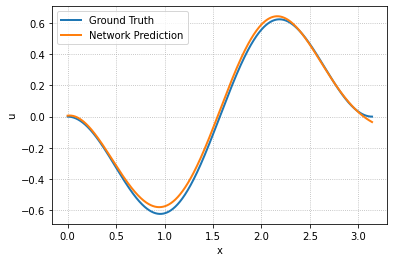

In [29]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, h1_test, label="Ground Truth",lw=2)
plt.plot(x_test, h1_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

In [30]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((h1_test_pred - h1_test)**2)/torch.mean(h1_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.470924936234951 %


In [31]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((h2_test_pred - h2_test)**2)/torch.mean(h2_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.11313933646306396 %


In [32]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((h3_test_pred - h3_test)**2)/torch.mean(h3_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  1.0269227437675 %


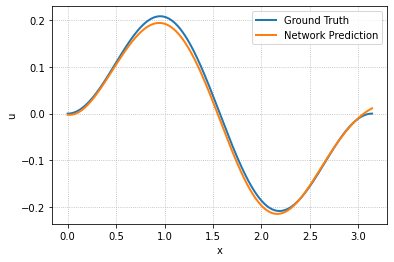

In [33]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, e1_test, label="Ground Truth",lw=2)
plt.plot(x_test, e1_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

In [34]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e1_test_pred - e1_test)**2)/torch.mean(e1_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.45746522955596447 %


In [35]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e2_test_pred - e2_test)**2)/torch.mean(e2_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.11318395845592022 %


In [36]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e3_test_pred - e3_test)**2)/torch.mean(e3_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  1.0549329221248627 %


In [37]:
# for ploting

In [38]:
model = my_network
x_test = pi*torch.rand(100000).reshape(-1,1)
y_test = pi*torch.rand(100000).reshape(-1,1)
z_test = pi*torch.rand(100000).reshape(-1,1)
t_test = torch.ones(100000).reshape(-1,1)

test = torch.cat([x_test, y_test, z_test, t_test],1)
h1_test = exact_solution_h1(x_test, y_test, z_test, t_test).reshape(-1,1)
h2_test = exact_solution_h2(x_test, y_test, z_test, t_test).reshape(-1,1)
h3_test = exact_solution_h3(x_test, y_test, z_test, t_test).reshape(-1,1)
e1_test = exact_solution_e1(x_test, y_test, z_test, t_test).reshape(-1,1)
e2_test = exact_solution_e2(x_test, y_test, z_test, t_test).reshape(-1,1)
e1_test = exact_solution_e1(x_test, y_test, z_test, t_test).reshape(-1,1)
e3_test = exact_solution_e3(x_test, y_test, z_test, t_test).reshape(-1,1)

w_test_pred = my_network(test)
h1_pred = w_test_pred[:, 0].reshape(-1,1) 
h2_pred = w_test_pred[:, 1].reshape(-1,1) 
h3_pred = w_test_pred[:, 2].reshape(-1,1) 
e1_pred = w_test_pred[:, 3].reshape(-1,1)
e2_pred = w_test_pred[:, 4].reshape(-1,1)
e3_pred = w_test_pred[:, 5].reshape(-1,1)


relative_error_h1 = torch.abs(h1_pred- h1_test)
relative_error_h2 = torch.abs(h2_pred- h2_test)
relative_error_h3 = torch.abs(h3_pred- h3_test)
relative_error_e1 = torch.abs(e1_pred- e1_test)
relative_error_e2 = torch.abs(e2_pred- e2_test)
relative_error_e3 = torch.abs(e3_pred- e3_test)

x_test = x_test.detach().numpy()
y_test = y_test.detach().numpy()
z_test = z_test.detach().numpy()
t_test = t_test.detach().numpy()
h1_pred = h1_pred.detach().numpy()
h2_pred = h2_pred.detach().numpy()
h3_pred = h3_pred.detach().numpy()
e1_pred = e1_pred.detach().numpy()
e2_pred = e2_pred.detach().numpy()
e3_pred = e3_pred.detach().numpy()
relative_error_h1 = relative_error_h1.detach().numpy()
relative_error_h2 = relative_error_h2.detach().numpy()
relative_error_h3 = relative_error_h3.detach().numpy()
relative_error_e1 = relative_error_e1.detach().numpy()
relative_error_e2 = relative_error_e2.detach().numpy()
relative_error_e3 = relative_error_e3.detach().numpy()

x_test = x_test.reshape(-1,)
y_test = y_test.reshape(-1,)
z_test = z_test.reshape(-1,)
t_test = t_test.reshape(-1,)
h1_pred = h1_pred.reshape(-1,)
h2_pred = h2_pred.reshape(-1,)
h3_pred = h3_pred.reshape(-1,)
e1_pred = e1_pred.reshape(-1,)
e2_pred = e2_pred.reshape(-1,)
e3_pred = e3_pred.reshape(-1,)

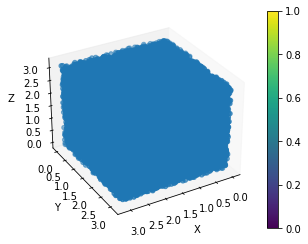

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(x_test, y_test, z_test, h1_test, cmap='coolwarm')
fig.colorbar(img)
ax.azim = 60
ax.grid(False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.savefig('Results/threed/exp1/h1_pred.png',dpi=300, bbox_inches = "tight")
plt.show()

In [40]:

x_test = x_test.reshape(-1,)
t_test = t_test.reshape(-1,)

u_pred = u_pred.reshape(-1,)
p_pred = p_pred.reshape(-1,)

NameError: name 'u_pred' is not defined

In [ ]:

plt.rcParams['figure.figsize'] = [10, 4]


CS = plt.tricontourf(x_test, t_test, u_pred, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


#plt.savefig('timo_u.png', dpi = 300, bbox_inches = "tight")

In [ ]:
CS = plt.tricontourf(x_test, t_test, p_pred, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('timo_p.png', dpi = 300, bbox_inches = "tight")

In [ ]:

x_test = x_test.reshape(-1, )
t_test = t_test.reshape(-1, )
relative_error = relative_error.reshape(-1,)




CS = plt.tricontourf(x_test, t_test, relative_error, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('relative_error_timo_u.png', dpi = 300, bbox_inches = "tight")

In [ ]:
relative_error1 = relative_error1.reshape(-1,)

CS = plt.tricontourf(x_test, t_test, relative_error1, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('relative_error_timo_p.png', dpi = 300, bbox_inches = "tight")